# Importing libraries:

In [127]:
%%capture
!pip install catboost

In [130]:
# Generic
import math
import pandas as pd
import numpy as np

# Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Training
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB


#metrics
from sklearn.metrics import classification_report, confusion_matrix

# warnings
import warnings
warnings.filterwarnings("ignore")

# Loading dataset:

In [3]:
df_app = pd.read_csv("applicant.csv")
df_loan = pd.read_csv("loan.csv")

In [4]:
df_app

applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
1         1203873                              22  female   
2         1432761                              49    male   
3         1207582                              45    male   
4         1674436                              53    male   
..            ...                             ...     ...   
995       1880194                              31  female   
996       1114064                              40    male   
997       1758046                              38    male   
998       1824545                              23    male   
999       1660770                              27    male   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
1    divorced/separated/married                     1       own   
2                        single                     2       own   
3                        single                     2  for free   
4                        single                     2  for free   
..                          ...                   ...       ...   
995  divorced/separated/married                     1       own   
996          divorced/separated                     1       own   
997                      single                     1       own   
998                      single                     1  for free   
999                      single                     1       own   

     Years_at_current_residence  \
0                             4   
1                             2   
2                             3   
3                             4   
4                             4   
..                          ...   
995                           4   
996                           4   
997                           4   
998                           4   
999                           4   

                                     Employment_status  \
0                          skilled employee / official   
1                          skilled employee / official   
2                                 unskilled - resident   
3                          skilled employee / official   
4                          skilled employee / official   
..                                                 ...   
995                               unskilled - resident   
996  management / self-employed / highly qualified ...   
997                        skilled employee / official   
998                        skilled employee / official   
999                        skilled employee / official   

    Has_been_employed_for_at_least Has_been_employed_for_at_most  \
0                          7 years                           NaN   
1                           1 year                       4 years   
2                          4 years                       7 years   
3                          4 years                       7 years   
4                           1 year                       4 years   
..                             ...                           ...   
995                        4 years                       7 years   
996                         1 year                       4 years   
997                        7 years                           NaN   
998                         1 year                       4 years   
999                            NaN                        0 year   

                                 Telephone  Foreign_worker  \
0    Registered under the applicant's name               1   
1                                      NaN               1   
2                                      NaN               1   
3                                      NaN               1   
4                                      NaN               1   
..                                     ...             ...   
995                                    NaN               1   
996  Registered under the applicant'

In [5]:
df_loan

loan_application_id  applicant_id  \
0    d68d975e-edad-11ea-8761-1d6f9c1ff461       1469590   
1    d68d989e-edad-11ea-b1d5-2bcf65006448       1203873   
2    d68d995c-edad-11ea-814a-1b6716782575       1432761   
3    d68d99fc-edad-11ea-8841-17e8848060ae       1207582   
4    d68d9a92-edad-11ea-9f3d-1f8682db006a       1674436   
..                                    ...           ...   
995  d68fbba6-edad-11ea-80fe-30b2f9300e3d       1880194   
996  d68fbc28-edad-11ea-bc62-4240ac0824fa       1114064   
997  d68fbcaa-edad-11ea-aafc-2de1139e42cd       1758046   
998  d68fbd2c-edad-11ea-b49e-2894666f2df6       1824545   
999  d68fbdae-edad-11ea-a2ea-1c661d77d225       1660770   

     Months_loan_taken_for               Purpose  Principal_loan_amount  \
0                        6  electronic equipment                1169000   
1                       48  electronic equipment                5951000   
2                       12             education                2096000   
3                       42                  FF&E                7882000   
4                       24           new vehicle                4870000   
..                     ...                   ...                    ...   
995                     12                  FF&E                1736000   
996                     30          used vehicle                3857000   
997                     12  electronic equipment                 804000   
998                     45  electronic equipment                1845000   
999                     45          used vehicle                4576000   

     EMI_rate_in_percentage_of_disposable_income  \
0                                              4   
1                                              2   
2                                              2   
3                                              2   
4                                              3   
..                                           ...   
995                                            3   
996                                            4   
997                                            4   
998                                            4   
999                                            3   

                                              Property  Has_coapplicant  \
0                                          real estate                0   
1                                          real estate                0   
2                                          real estate                0   
3    building society savings agreement/life insurance                0   
4                                                  NaN                0   
..                                                 ...              ...   
995                                        real estate                0   
996  building society savings agreement/life insurance                0   
997                                       car or other                0   
998                                                NaN                0   
999                                       car or other                0   

     Has_guarantor Other_EMI_plans  Number_of_existing_loans_at_this_bank  \
0                0             NaN                                      2   
1                0             NaN                                      1   
2                0             NaN                                      1   
3                1             NaN                                      1   
4                0             NaN                                      2   
..             ...             ...                                    ...   
995              0             NaN                                      1   
996              0             NaN                                      1   
997              0             NaN                                      1   
998              0             NaN                                      1   
999              0             NaN     

## Joining the 2 pandas df:

In [6]:
df = pd.merge(df_app, df_loan, on = 'applicant_id', how = 'inner', sort = False)
df

applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
1         1203873                              22  female   
2         1432761                              49    male   
3         1207582                              45    male   
4         1674436                              53    male   
..            ...                             ...     ...   
995       1880194                              31  female   
996       1114064                              40    male   
997       1758046                              38    male   
998       1824545                              23    male   
999       1660770                              27    male   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
1    divorced/separated/married                     1       own   
2                        single                     2       own   
3                        single                     2  for free   
4                        single                     2  for free   
..                          ...                   ...       ...   
995  divorced/separated/married                     1       own   
996          divorced/separated                     1       own   
997                      single                     1       own   
998                      single                     1  for free   
999                      single                     1       own   

     Years_at_current_residence  \
0                             4   
1                             2   
2                             3   
3                             4   
4                             4   
..                          ...   
995                           4   
996                           4   
997                           4   
998                           4   
999                           4   

                                     Employment_status  \
0                          skilled employee / official   
1                          skilled employee / official   
2                                 unskilled - resident   
3                          skilled employee / official   
4                          skilled employee / official   
..                                                 ...   
995                               unskilled - resident   
996  management / self-employed / highly qualified ...   
997                        skilled employee / official   
998                        skilled employee / official   
999                        skilled employee / official   

    Has_been_employed_for_at_least Has_been_employed_for_at_most  ...  \
0                          7 years                           NaN  ...   
1                           1 year                       4 years  ...   
2                          4 years                       7 years  ...   
3                          4 years                       7 years  ...   
4                           1 year                       4 years  ...   
..                             ...                           ...  ...   
995                        4 years                       7 years  ...   
996                         1 year                       4 years  ...   
997                        7 years                           NaN  ...   
998                         1 year                       4 years  ...   
999                            NaN                        0 year  ...   

                  Purpose  Principal_loan_amount  \
0    electronic equipment                1169000   
1    electronic equipment                5951000   
2               education                2096000   
3                    FF&E                7882000   
4             new vehicle                4870000   
..                    ...                    ...   
995                  FF&E                1736000   
996          used vehicle                3857000   
997 

# Data exploration:

## Basic description:

In [7]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*100)
    print('FEATURE DATA TYPES: ')
    print(data.info())
    print('\n', '-'*100)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*100)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    print('\n', '-'*100)
    print('DUPLICATE  VALUES')
    print(data.duplicated().sum())

In [8]:
show_info(df)

DATASET SHAPE:  (1000, 27) 

----------------------------------------------------------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                        

INFERENCE:
- Most of the features don't have NaN values. Howeever, some features like Telephone, Balance in existing bank account (lower and upper limits), and other EMI plans mostly contain NaN values. - Since, Telephone feature anyways is insignificant to our analysis, we drop it.
- Also, since we have feature of Saving account balance we can drop Balance in existing bank account (lower and upper limits).
- No imputing strategy can successfully fill 80% of missing values in other EMI plans, so we have to drop it, unfortunately.
- Lastly, loan_id and application_id are also insignificant to our analysis, so we drop them too.

## Dropping some features:

In [87]:
df1 = df.drop(['applicant_id', 'loan_application_id', 'Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Other_EMI_plans'], axis='columns')
df1

Primary_applicant_age_in_years  Gender              Marital_status  \
0                                67    male                      single   
1                                22  female  divorced/separated/married   
2                                49    male                      single   
3                                45    male                      single   
4                                53    male                      single   
..                              ...     ...                         ...   
995                              31  female  divorced/separated/married   
996                              40    male          divorced/separated   
997                              38    male                      single   
998                              23    male                      single   
999                              27    male                      single   

     Number_of_dependents   Housing  Years_at_current_residence  \
0                       1       own                           4   
1                       1       own                           2   
2                       2       own                           3   
3                       2  for free                           4   
4                       2  for free                           4   
..                    ...       ...                         ...   
995                     1       own                           4   
996                     1       own                           4   
997                     1       own                           4   
998                     1  for free                           4   
999                     1       own                           4   

                                     Employment_status  \
0                          skilled employee / official   
1                          skilled employee / official   
2                                 unskilled - resident   
3                          skilled employee / official   
4                          skilled employee / official   
..                                                 ...   
995                               unskilled - resident   
996  management / self-employed / highly qualified ...   
997                        skilled employee / official   
998                        skilled employee / official   
999                        skilled employee / official   

    Has_been_employed_for_at_least Has_been_employed_for_at_most  \
0                          7 years                           NaN   
1                           1 year                       4 years   
2                          4 years                       7 years   
3                          4 years                       7 years   
4                           1 year                       4 years   
..                             ...                           ...   
995                        4 years                       7 years   
996                         1 year                       4 years   
997                        7 years                           NaN   
998                         1 year                       4 years   
999                            NaN                        0 year   

     Foreign_worker  ... Months_loan_taken_for               Purpose  \
0                 1  ...                     6  electronic equipment   
1                 1  ...                    48  electronic equipment   
2                 1  ...                    12             education   
3                 1  ...                    42                  FF&E   
4                 1  ...                    24           new vehicle   
..              ...  ...                   ...                   ...   
995               1  ...                    12                  FF&E   
996               1  ...                    30          used vehicle   
997               1  ...                    12  electronic equipment   
998               1  ...                    45  electronic equipm

## Univariate analysis:

### Numerical features:
- Primary_applicant_age_in_years
- Months_loan_taken_for
- Principal_loan_amount

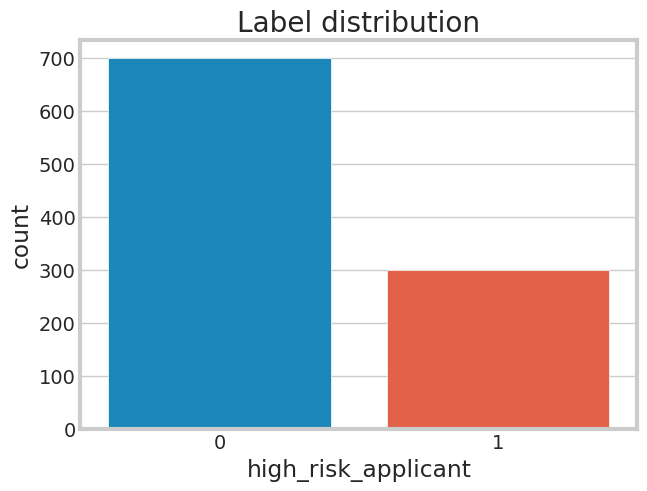

In [88]:
plt.title("Label distribution")
sns.countplot(data = df1, x = 'high_risk_applicant')
plt.show()

<Axes: xlabel='Principal_loan_amount', ylabel='Density'>

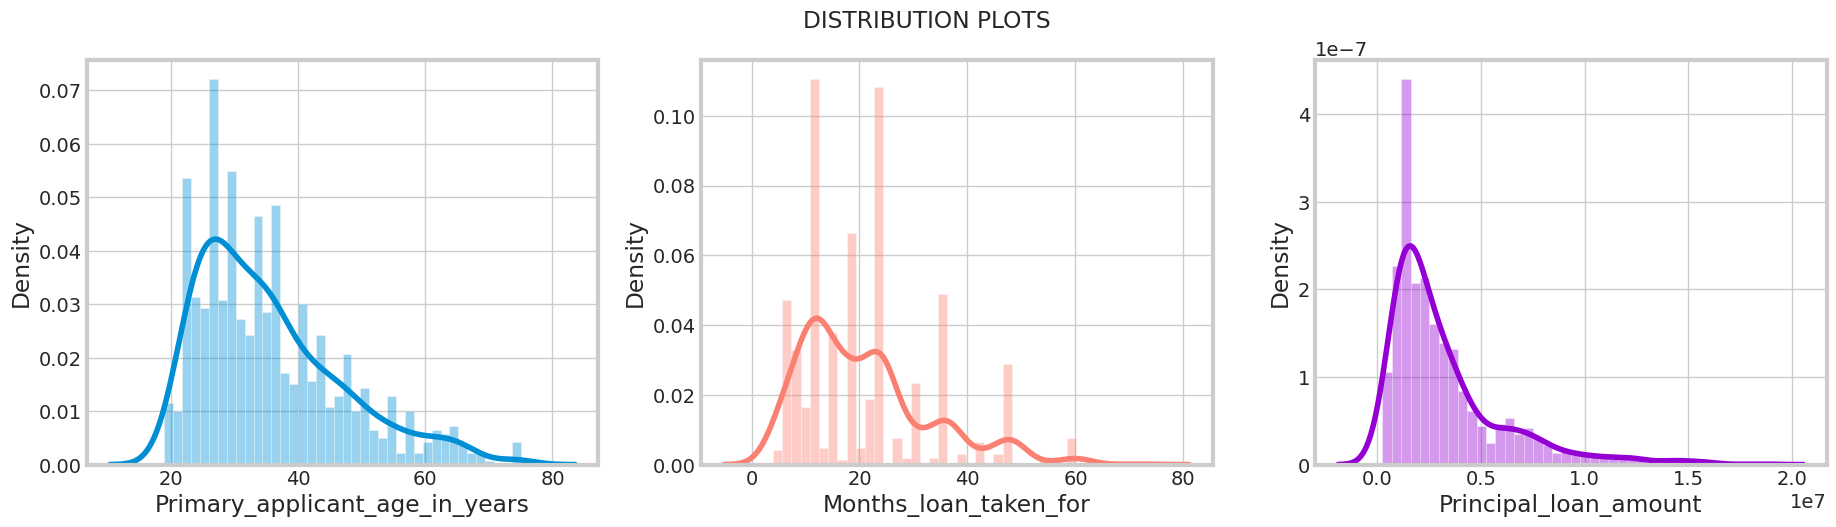

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['Primary_applicant_age_in_years'], bins=40, ax=ax[0])
sns.distplot(df['Months_loan_taken_for'], bins=40, ax=ax[1], color='salmon')
sns.distplot(df['Principal_loan_amount'], bins=40, ax=ax[2], color='darkviolet')

<Axes: >

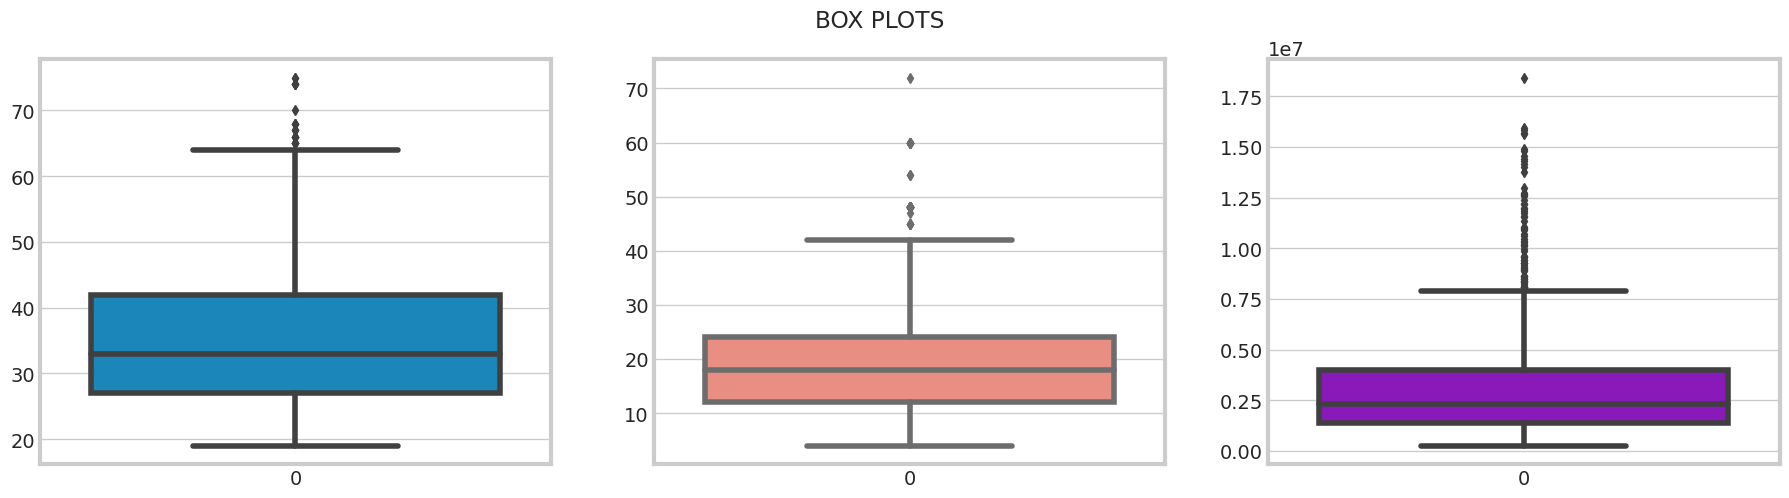

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df['Primary_applicant_age_in_years'], ax=ax[0])
sns.boxplot(df['Months_loan_taken_for'], ax=ax[1], color='salmon')
sns.boxplot(df['Principal_loan_amount'], ax=ax[2], color='darkviolet')

INFERENCE:
- People from age group of 25-40 years have taken most of the loans.
- Most of the people have opted for a loan in range of 20 Lac Rs - 45 Lac Rs, with most popular choice of 25 Lac Rs.
- Most people have opted to clear the loan within a period of 1-2 years, with most people opting for 1.5 years period.

In [12]:
# Basic statistics:
df[['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']].describe()

Primary_applicant_age_in_years  Months_loan_taken_for  \
count                     1000.000000            1000.000000   
mean                        35.546000              20.903000   
std                         11.375469              12.058814   
min                         19.000000               4.000000   
25%                         27.000000              12.000000   
50%                         33.000000              18.000000   
75%                         42.000000              24.000000   
max                         75.000000              72.000000   

       Principal_loan_amount  
count           1.000000e+03  
mean            3.271258e+06  
std             2.822737e+06  
min             2.500000e+05  
25%             1.365500e+06  
50%             2.319500e+06  
75%             3.972250e+06  
max             1.842400e+07

### Categorical features (IMPORTANT ONES):
- Gender                                                      
- Marital_status                                                                                 
- Housing                                                                                  
- Employment_status                                          
                                          
- Savings_account_balance                                                                            
- Purpose                                                                          
- Property                                                   
- Has_coapplicant                                            
- Has_guarantor                                                                                         
- Number_of_existing_loans_at_this_bank                      
- Loan_history                                               
- high_risk_applicant                                        

In [13]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Gender", "Marital_status", "Employment_status"),
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Gender'].value_counts().index,
                     values=df['Gender'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Marital_status'].value_counts().index,
                     values=df['Marital_status'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['Employment_status'].value_counts().index,
                     values=df['Employment_status'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [14]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Housing", "Purpose", "Property"),
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Housing'].value_counts().index,
                     values=df['Housing'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Purpose'].value_counts().index,
                     values=df['Purpose'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['Property'].value_counts().index,
                     values=df['Property'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [15]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Savings_account_balance", "Loan_history", "high_risk_applicant"),
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Savings_account_balance'].value_counts().index,
                     values=df['Savings_account_balance'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Loan_history'].value_counts().index,
                     values=df['Loan_history'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['high_risk_applicant'].value_counts().index,
                     values=df['high_risk_applicant'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [16]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Has_coapplicant", "Has_guarantor", "Number_of_existing_loans_at_this_bank"),
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Has_coapplicant'].value_counts().index,
                     values=df['Has_coapplicant'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Has_guarantor'].value_counts().index,
                     values=df['Has_guarantor'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['Number_of_existing_loans_at_this_bank'].value_counts().index,
                     values=df['Number_of_existing_loans_at_this_bank'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

INFERENCE:
- Most of the loan applicants mostly consist of single males and remarried males.
- More than 50% (63% to be precise) loan applicants are skilled professionals. However, a significant portion of unskilled people and people in high level positions have also opted for a loan.
- Many house owners have opted for a loan, mostly for the purpose of electronic equipment, new & used vehicle and Furniture, fixtures, and equipment (FF&E) and business.
- About 75% of loan applicants have low cash in their savings account, hence the need for loan.
- More than 50% of the applicants have been loyal and paid back their loans on time before. However, a significant portion (about 30%) of applicants haven't done so, henc pose a high risk fo being defaulters.
- Overall, 30% of the applicant are highly risky and 70% are good to go. Hencem implying an imbalance in the dataset.
- Interestingly, majority of applicants don't have a co_applicant and guarantor, which otherwise plays an important factor to convince the lendors that the applicant is of low risk.
- Lastly, majority of the applicants have low number of pending loans at this particular bank.

## Bivariate analysis:

### Correlation matrix:

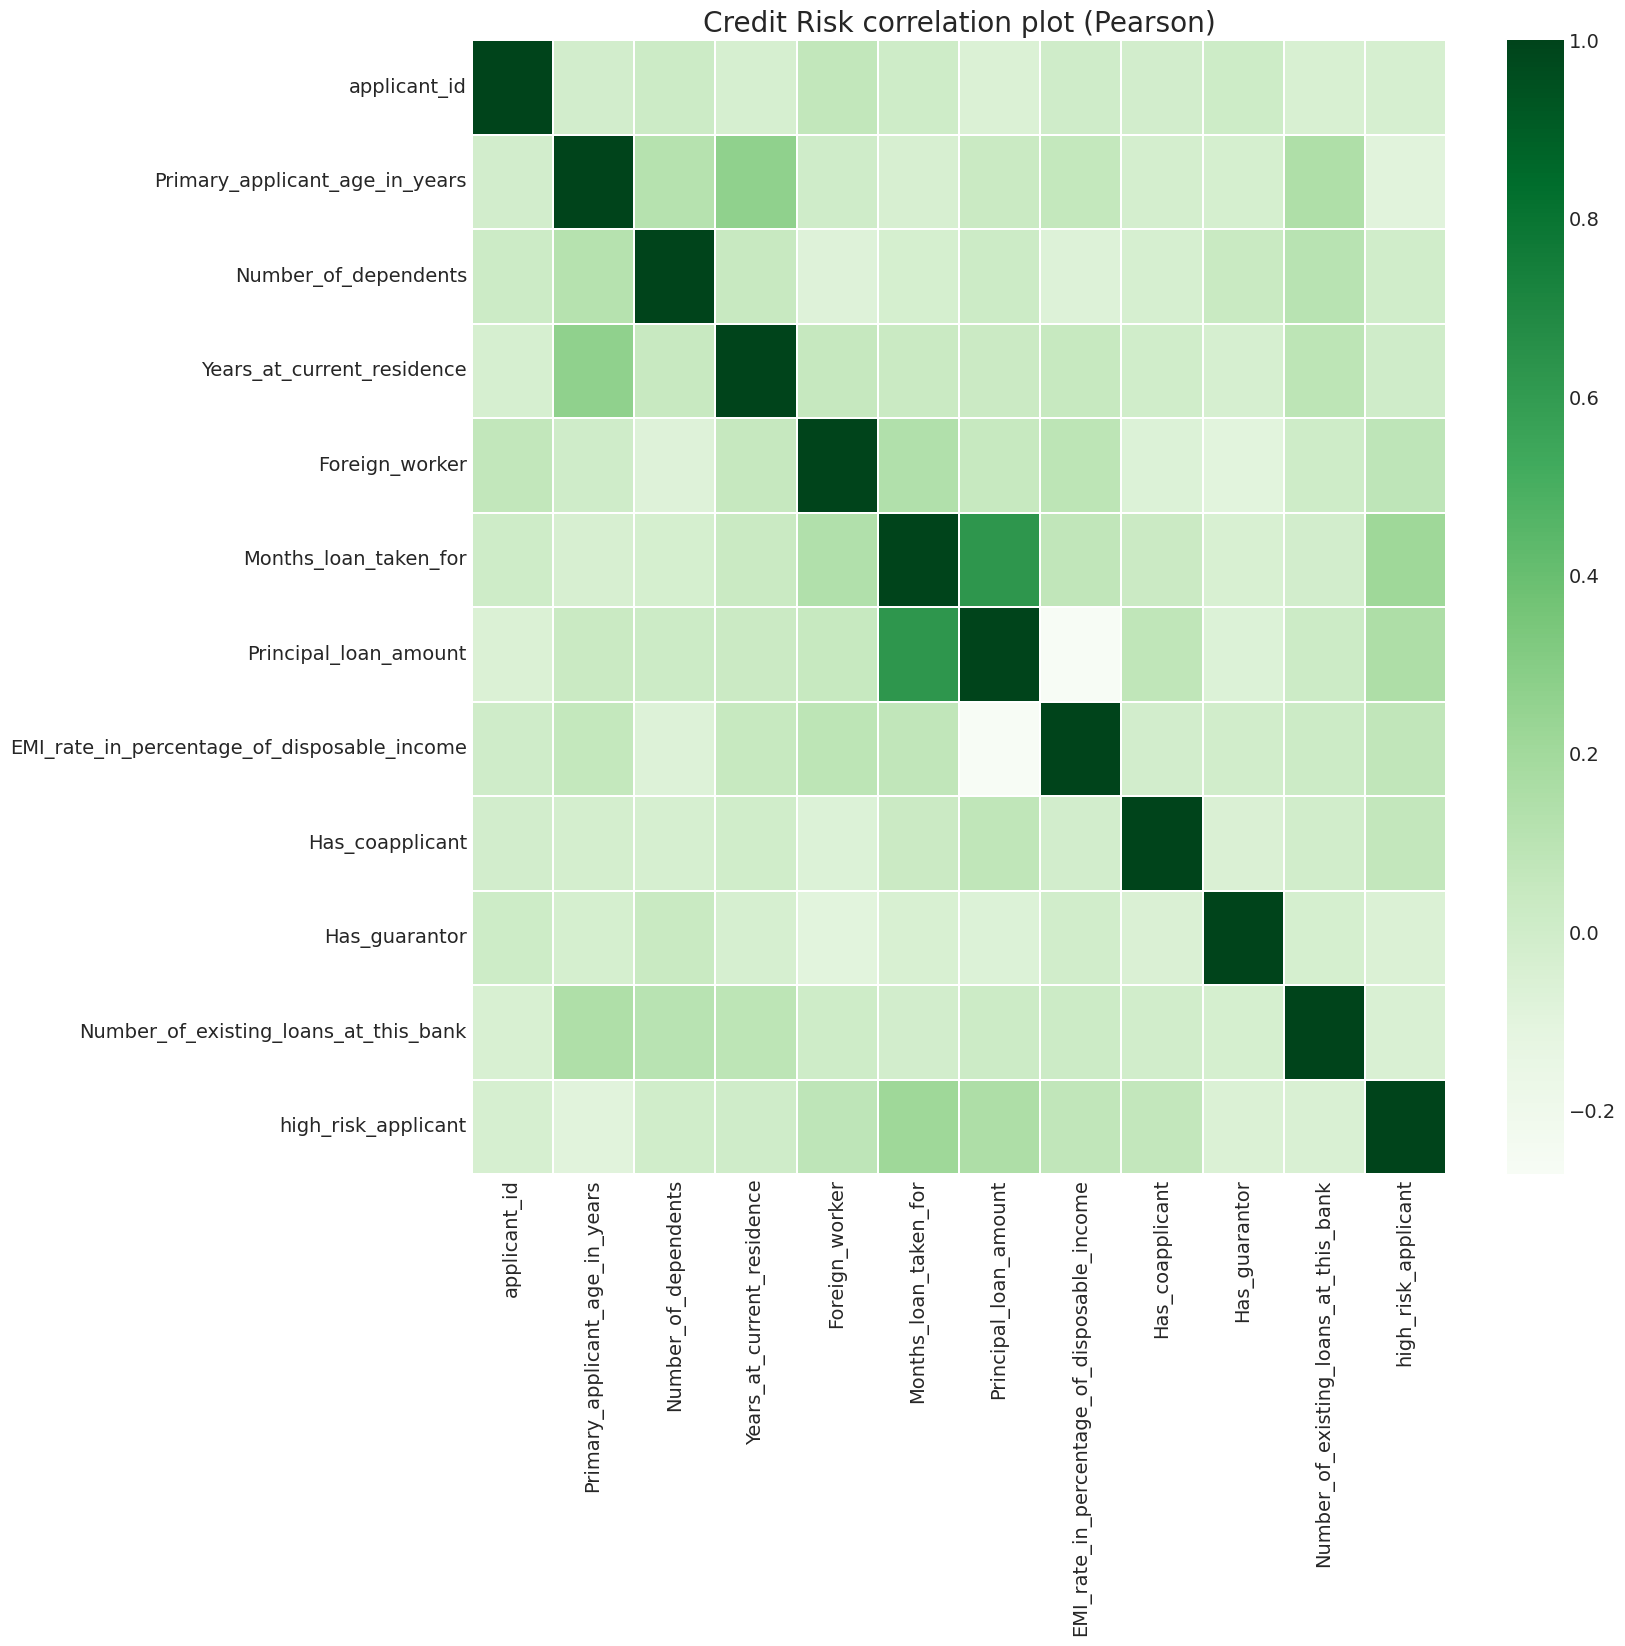

In [17]:
plt.figure(figsize = (14,14))
plt.title('Credit Risk correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1, cmap="Greens")
plt.show()

INFERENCE:
- As expected, principal loan amount months for loan are positively correlated. Since, it would take quite an amount of time to pay back a huge amount of loan.
- We also see that number of years in current residence and age of applicant show positive correlation.

### Numerical features:

#### Gender

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

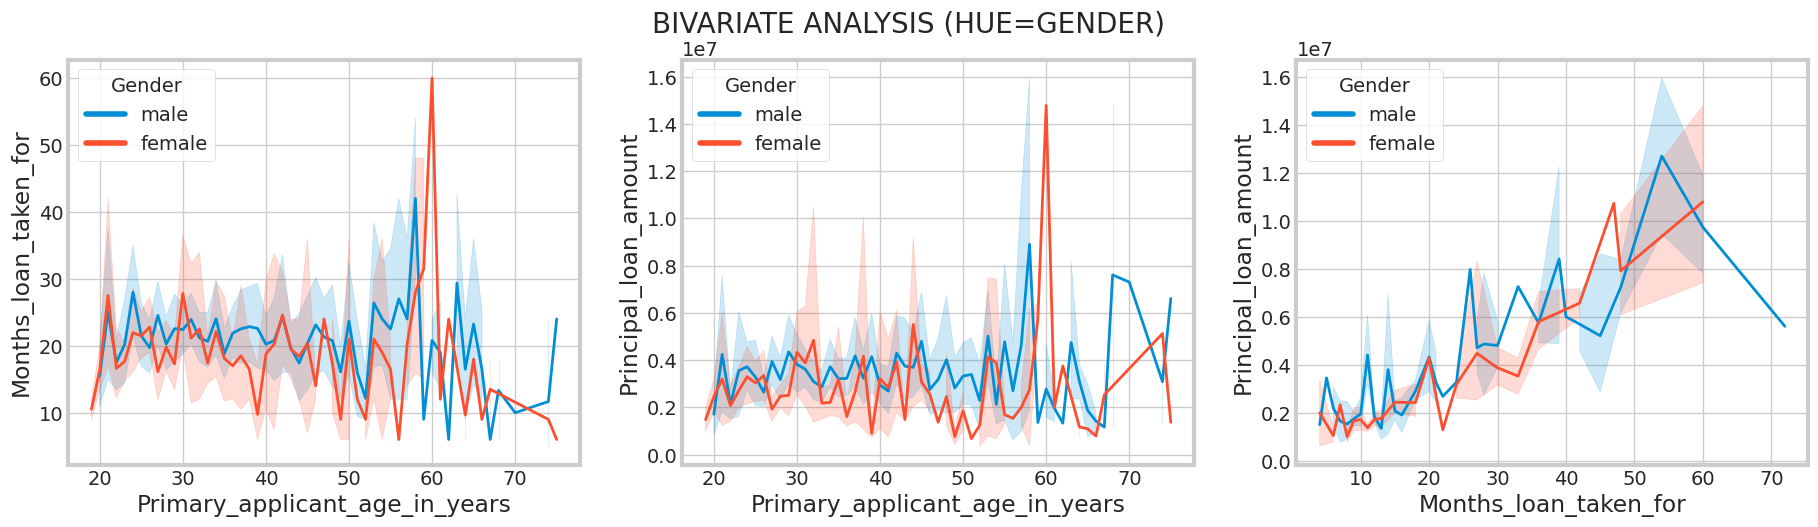

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BIVARIATE ANALYSIS (HUE=GENDER)', fontsize=20)
# plt.tight_layout()

sns.lineplot(data=df, y='Months_loan_taken_for', x='Primary_applicant_age_in_years', hue='Gender', lw=2, ax=ax[0])
sns.lineplot(data=df, y='Principal_loan_amount', x='Primary_applicant_age_in_years', hue='Gender', lw=2, ax=ax[1])
sns.lineplot(data=df, y='Principal_loan_amount', x='Months_loan_taken_for', hue='Gender', lw=2, ax=ax[2])

INFERENCE:
- From above plots, its evident that people in young and little elder age (<55 years), take principal loan in the most frequent range as described above; for a period of 1-2 years.
- However, senior/retired citizens take a huge amount of loan for a long period time.

#### Savings_account_balance:

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

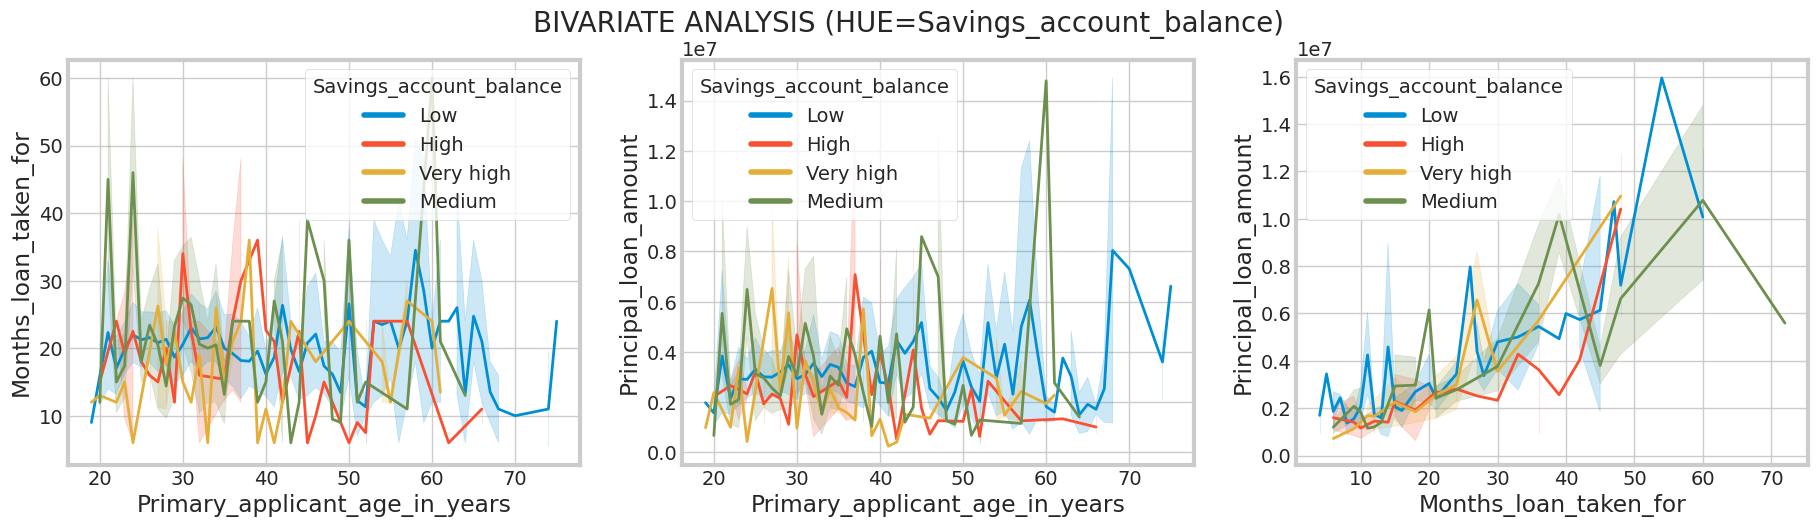

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BIVARIATE ANALYSIS (HUE=Savings_account_balance)', fontsize=20)
# plt.tight_layout()

sns.lineplot(data=df, y='Months_loan_taken_for', x='Primary_applicant_age_in_years', hue='Savings_account_balance', lw=2, ax=ax[0])
sns.lineplot(data=df, y='Principal_loan_amount', x='Primary_applicant_age_in_years', hue='Savings_account_balance', lw=2, ax=ax[1])
sns.lineplot(data=df, y='Principal_loan_amount', x='Months_loan_taken_for', hue='Savings_account_balance', lw=2, ax=ax[2])

INFERENCE:
- Mostly senior citizens who have low to medium saving account balance opt for a retirement age loan, while the ones with high balance do very rarely.
- In contrast, in the younger population, the applicants who have a high savings account balalnce mostly opt for a loan.

# Risk Analysis:

## Univariate Numerical:

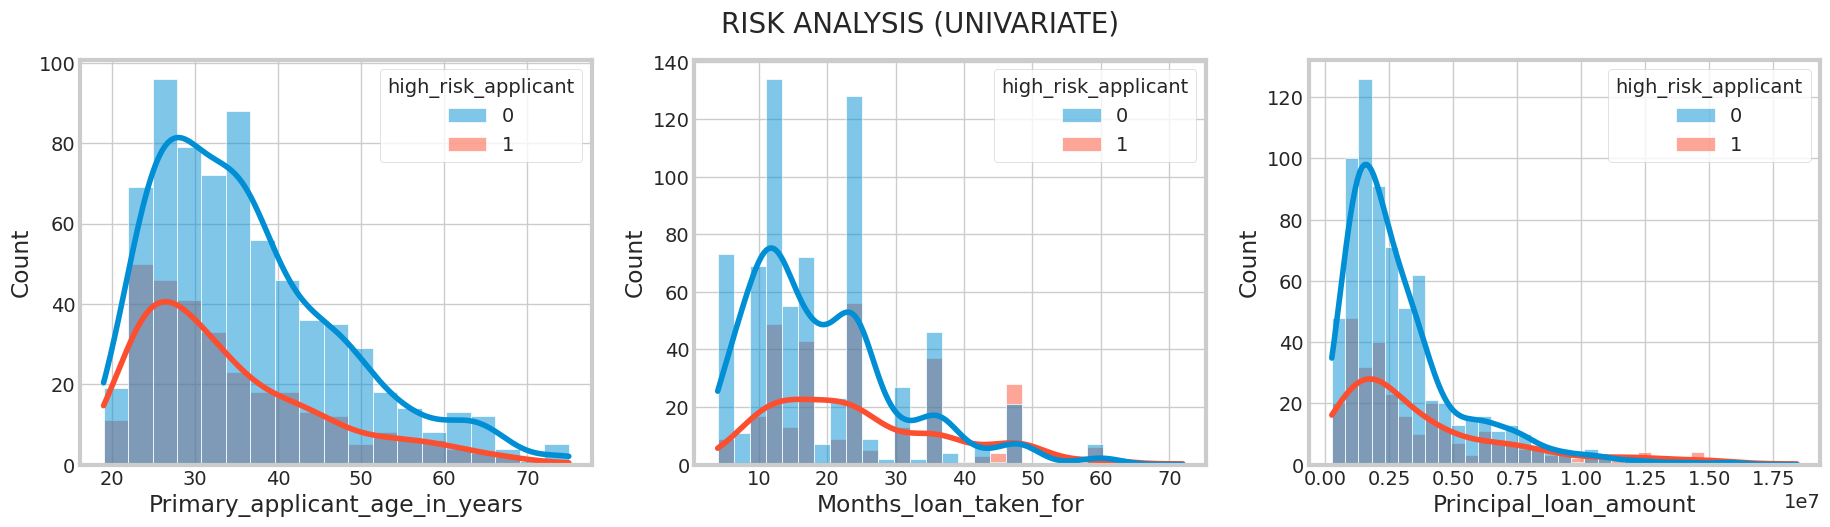

In [20]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('RISK ANALYSIS (UNIVARIATE)', fontsize=20)
# plt.tight_layout()

sns.histplot(data=df, x='Primary_applicant_age_in_years', ax=ax[0], hue = 'high_risk_applicant', kde=True)
sns.histplot(data=df, x='Months_loan_taken_for', ax=ax[1], hue = 'high_risk_applicant', kde=True)
sns.histplot(data=df, x='Principal_loan_amount', ax=ax[2], hue = 'high_risk_applicant', kde=True)
plt.show()

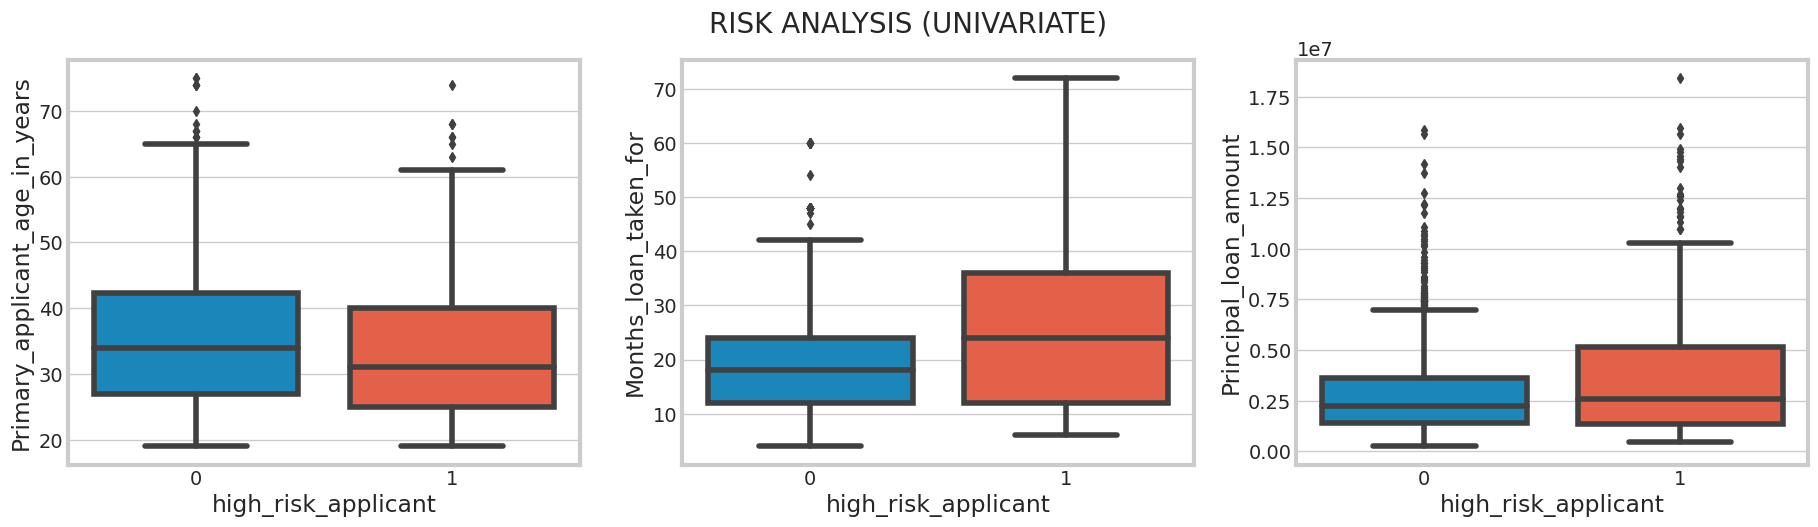

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('RISK ANALYSIS (UNIVARIATE)', fontsize=20)
# plt.tight_layout()

sns.boxplot(data=df, x = 'high_risk_applicant', y='Primary_applicant_age_in_years', ax=ax[0])
sns.boxplot(data=df, x = 'high_risk_applicant', y='Months_loan_taken_for', ax=ax[1])
sns.boxplot(data=df, x = 'high_risk_applicant', y='Principal_loan_amount', ax=ax[2])
plt.show()

INFERENCE:
- The high risk applicants lie mostly in the range of 25-40, i.e., the age group which consists of maximum number of applications.
- Again, most of the defaulters have taken principal loan amount same as the most popular choice, i.e, 20-45 Lac Rs. Here, although range extends to around 50 Lac Rs.
- This doesn't provide us with any new information. Because, since these ranges have highest number of applicants, hence the probability of an applicant being a high risk alos increases.

## Bivariate Categorical:

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

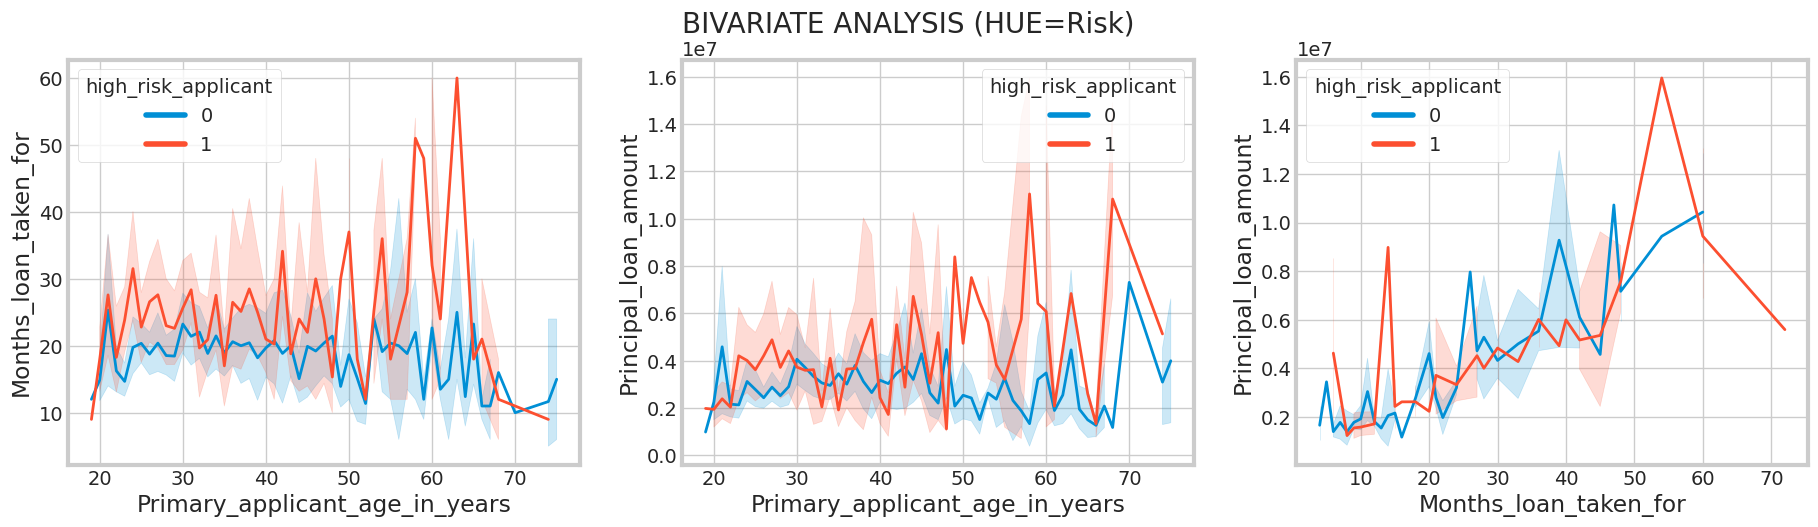

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BIVARIATE ANALYSIS (HUE=Risk)', fontsize=20)
# plt.tight_layout()

sns.lineplot(data=df, y='Months_loan_taken_for', x='Primary_applicant_age_in_years', hue='high_risk_applicant', lw=2, ax=ax[0])
sns.lineplot(data=df, y='Principal_loan_amount', x='Primary_applicant_age_in_years', hue='high_risk_applicant', lw=2, ax=ax[1])
sns.lineplot(data=df, y='Principal_loan_amount', x='Months_loan_taken_for', hue='high_risk_applicant', lw=2, ax=ax[2])

## Categorical features:

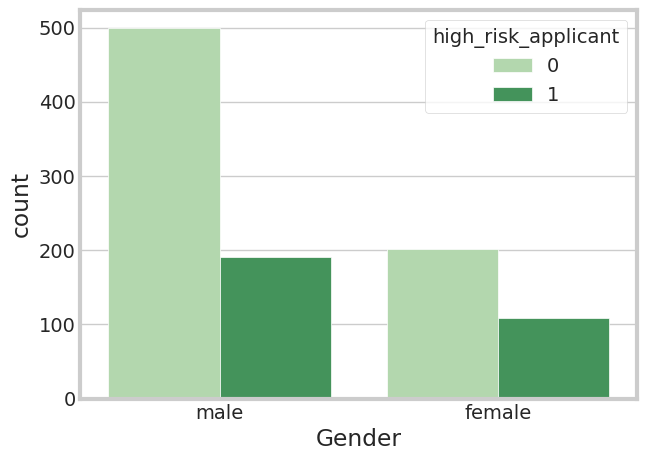

In [23]:
sns.countplot(x = df['Gender'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

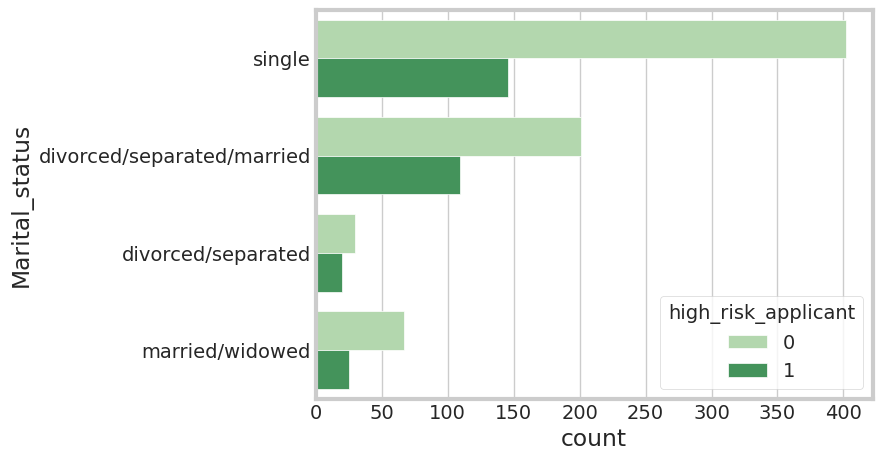

In [24]:
sns.countplot(y = df['Marital_status'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

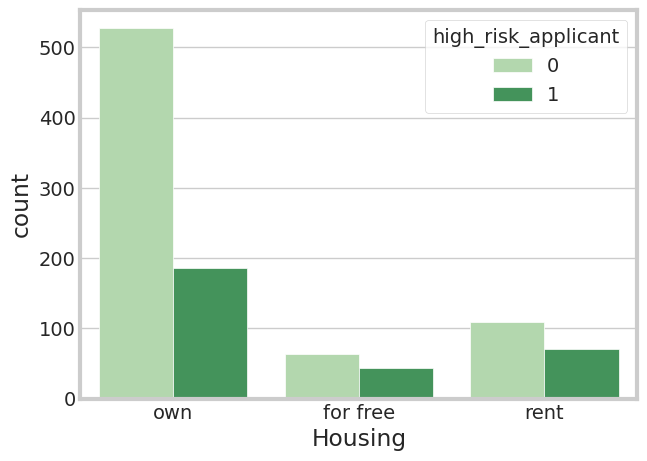

In [25]:
sns.countplot(x = df['Housing'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

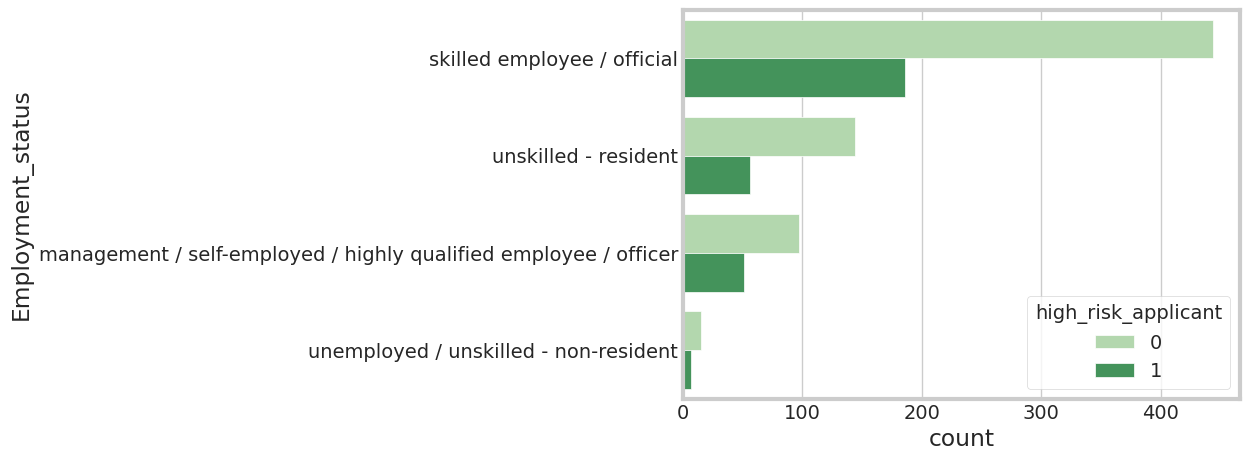

In [26]:
sns.countplot(y = df['Employment_status'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

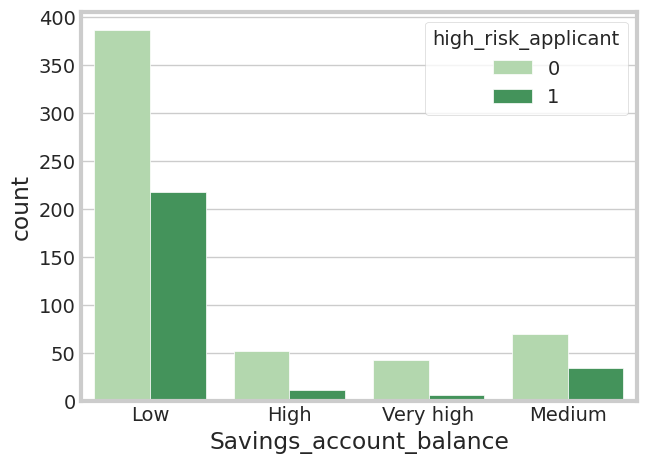

In [27]:
sns.countplot(x = df['Savings_account_balance'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

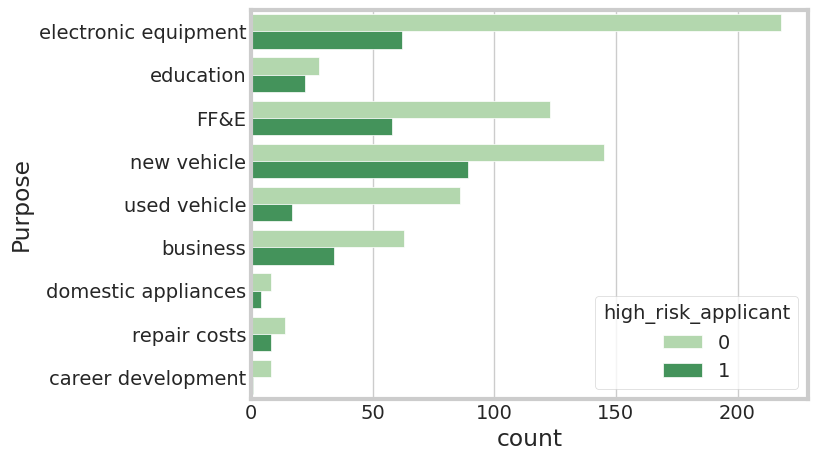

In [28]:
sns.countplot(y = df['Purpose'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

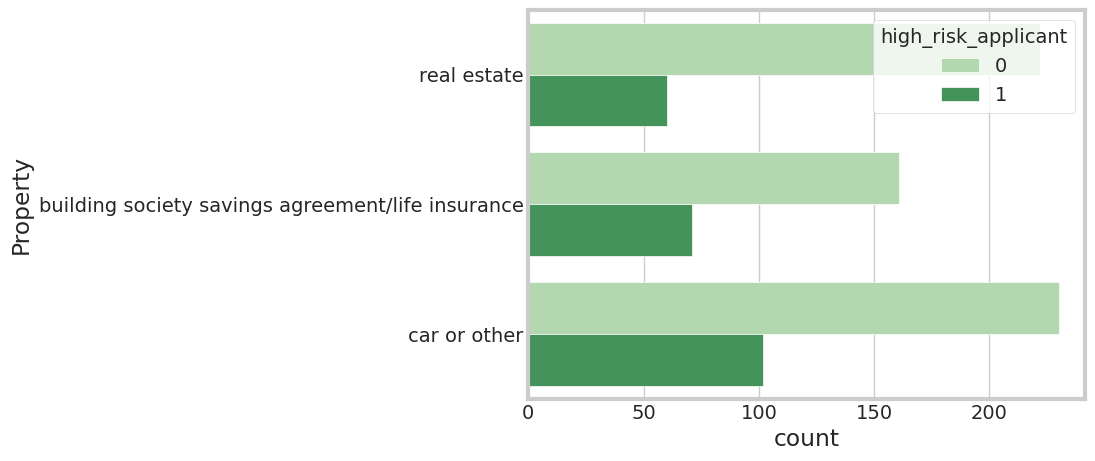

In [29]:
sns.countplot(y = df['Property'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

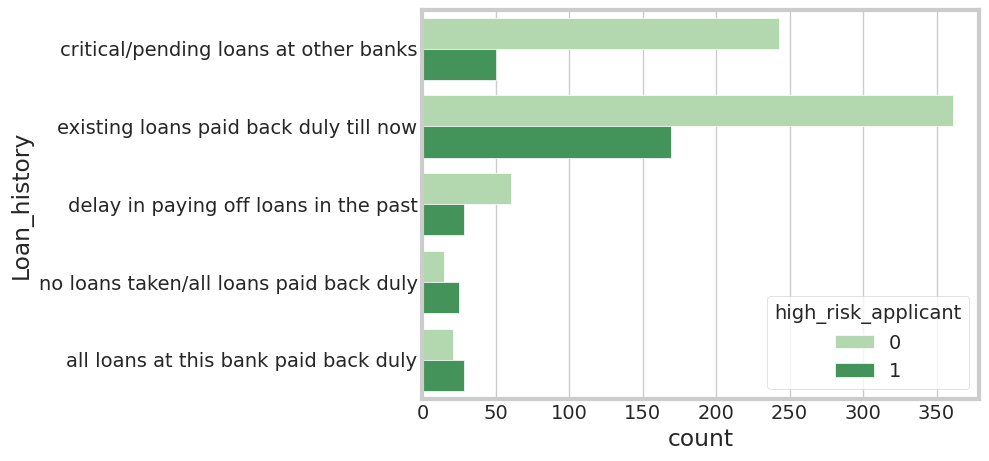

In [30]:
sns.countplot(y = df['Loan_history'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

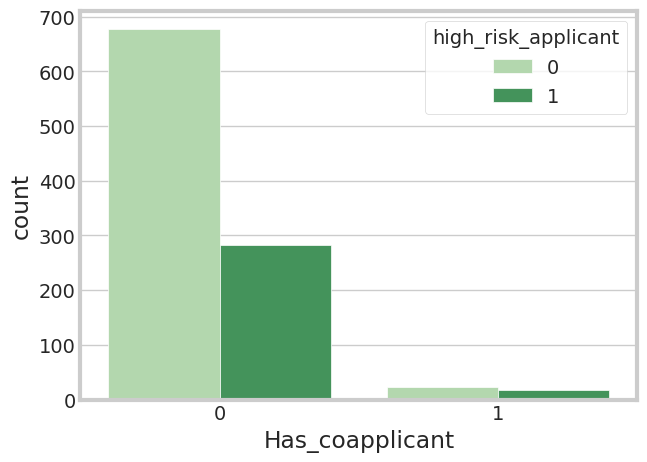

In [31]:
sns.countplot(x = df['Has_coapplicant'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

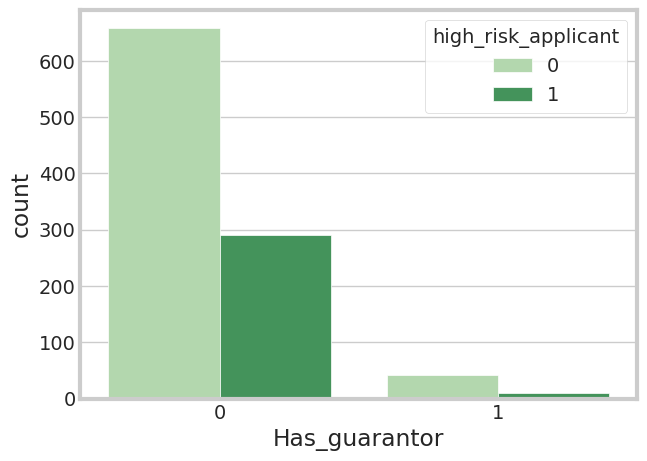

In [32]:
sns.countplot(x = df['Has_guarantor'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

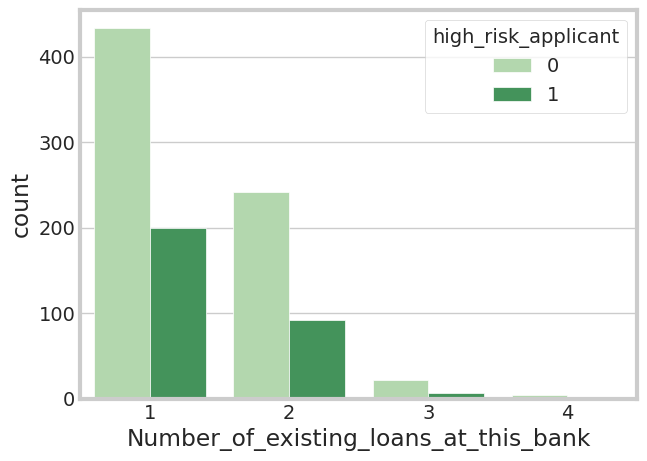

In [33]:
sns.countplot(x = df['Number_of_existing_loans_at_this_bank'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

INFERENCE:
- Same as numerical features, the group with highest numbers has highest number of highly risky applicants, hence not providing any new significant discoveries.

## Numerical + Categorical:

### Age as numerical:

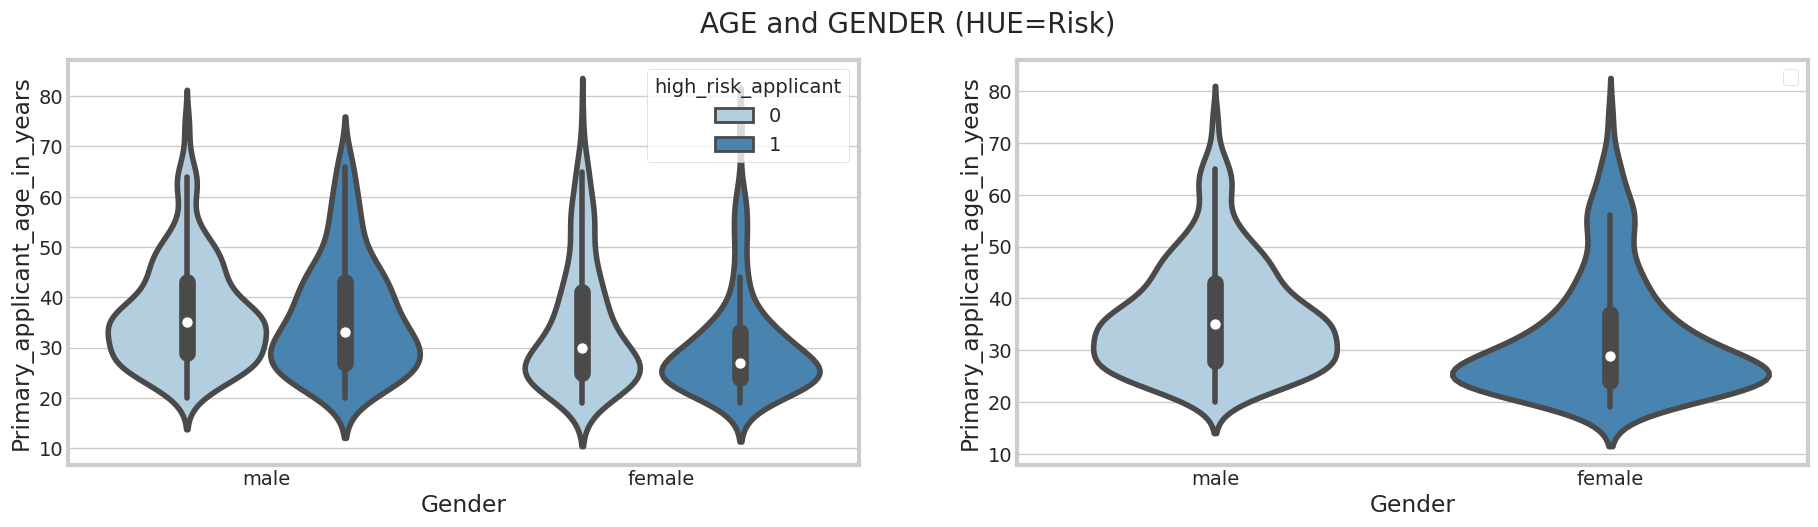

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and GENDER (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Gender'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Gender'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

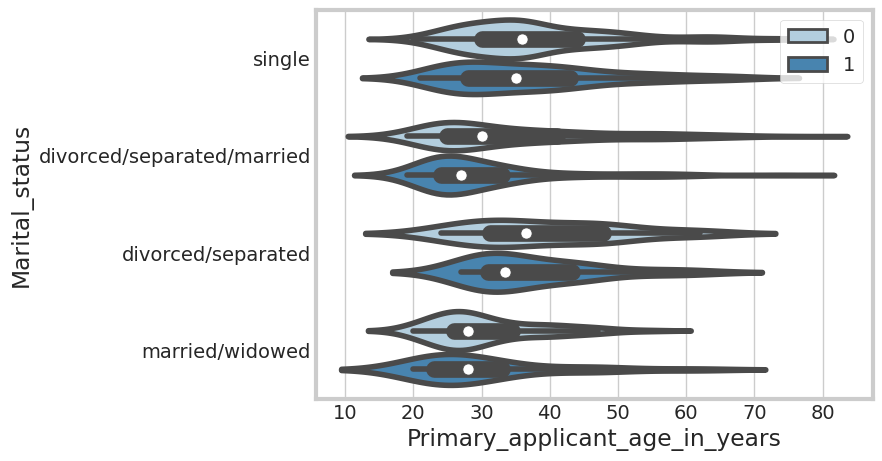

In [35]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Marital_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

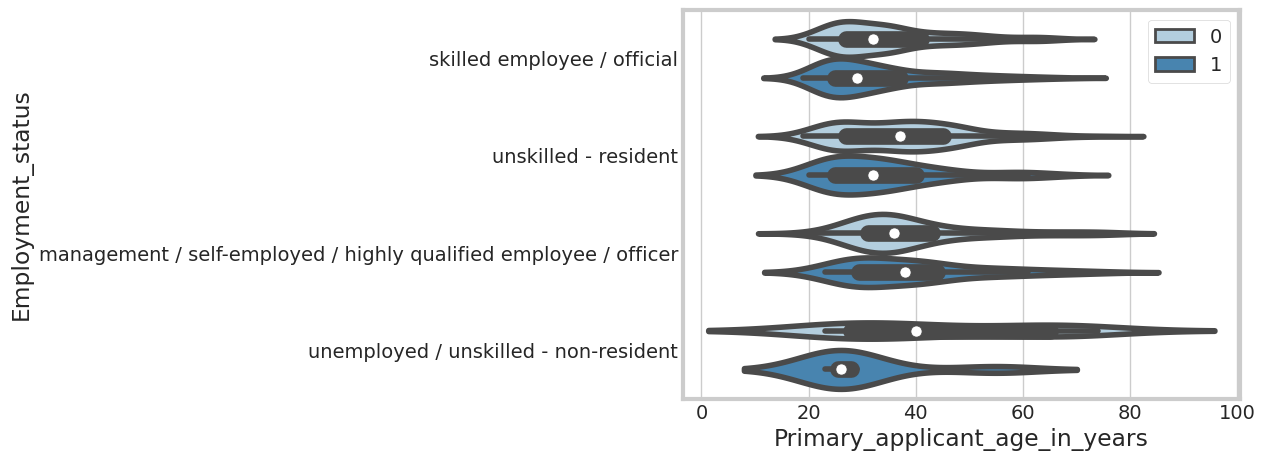

In [36]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Employment_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

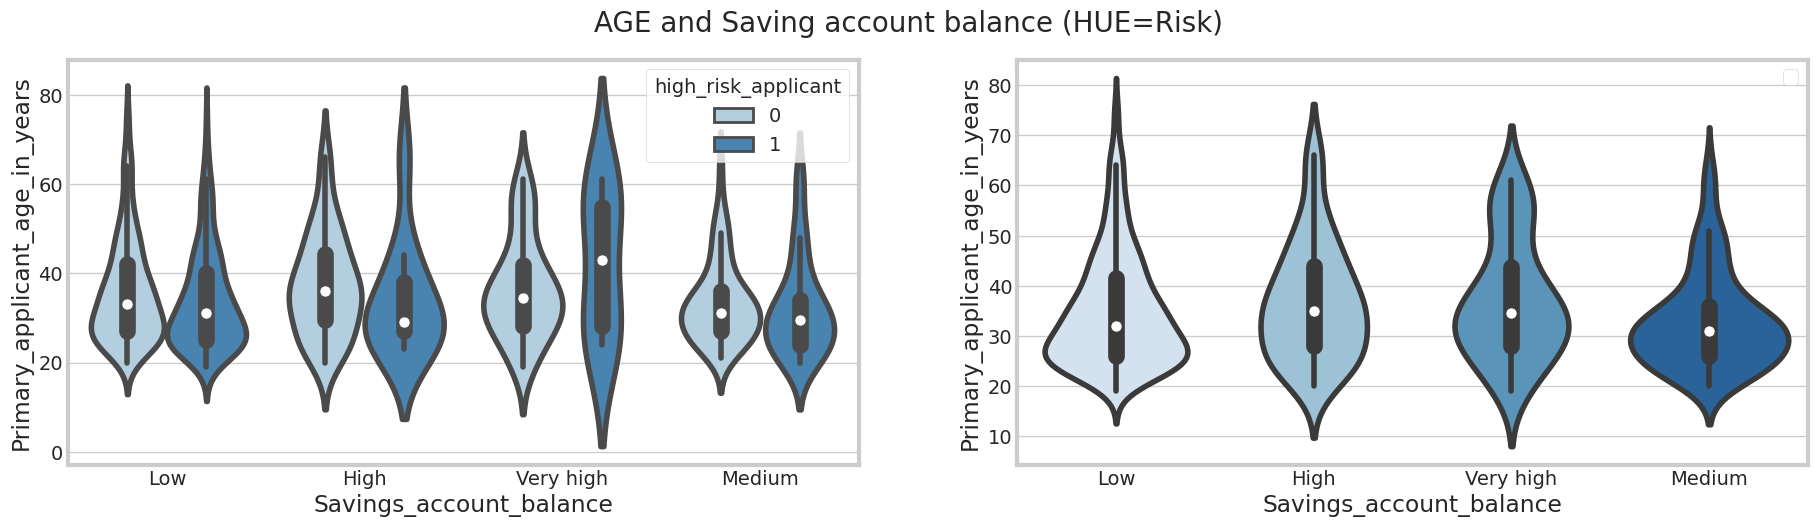

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and Saving account balance (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Savings_account_balance'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Savings_account_balance'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

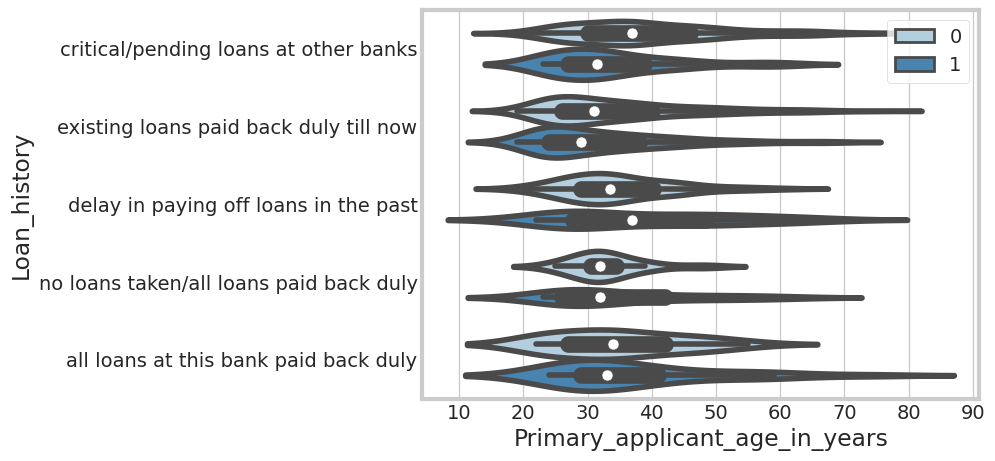

In [38]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Loan_history'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

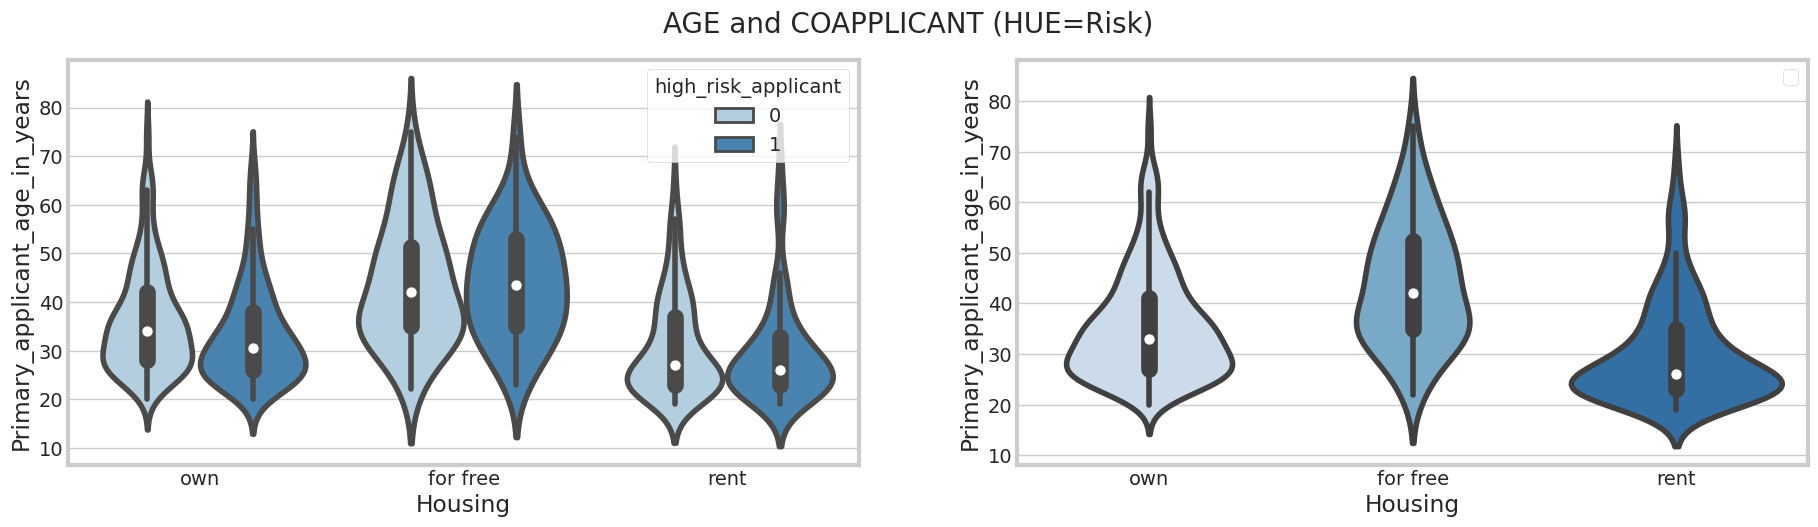

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and COAPPLICANT (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Housing'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Housing'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

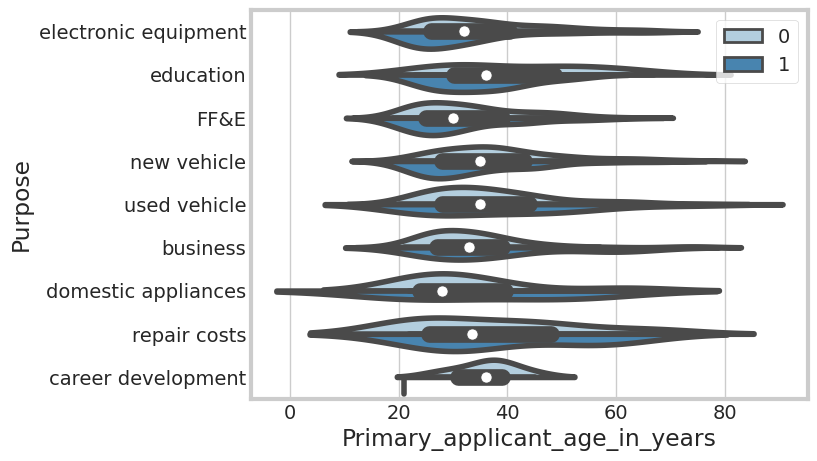

In [40]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Purpose'], hue=df.high_risk_applicant, palette="Blues", split=True)
plt.legend(loc='upper right')
plt.show()

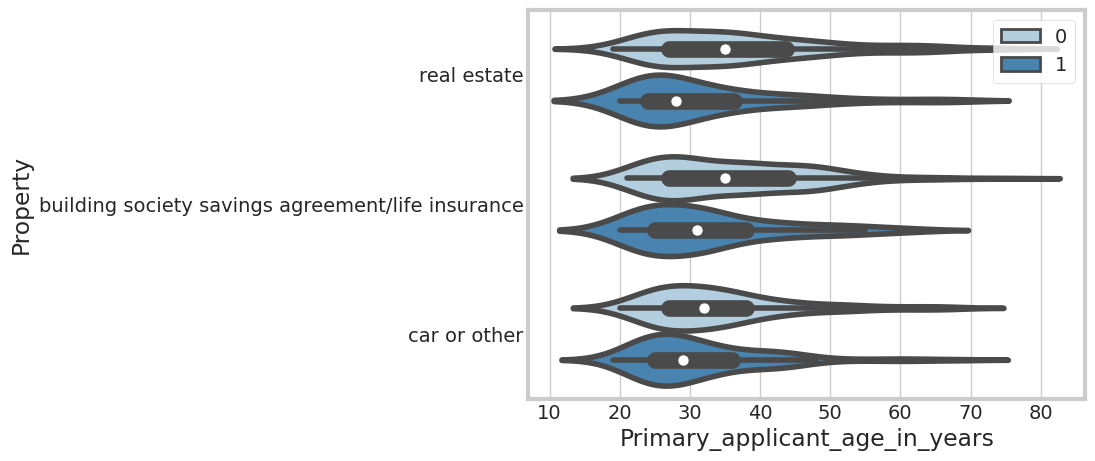

In [41]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Property'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

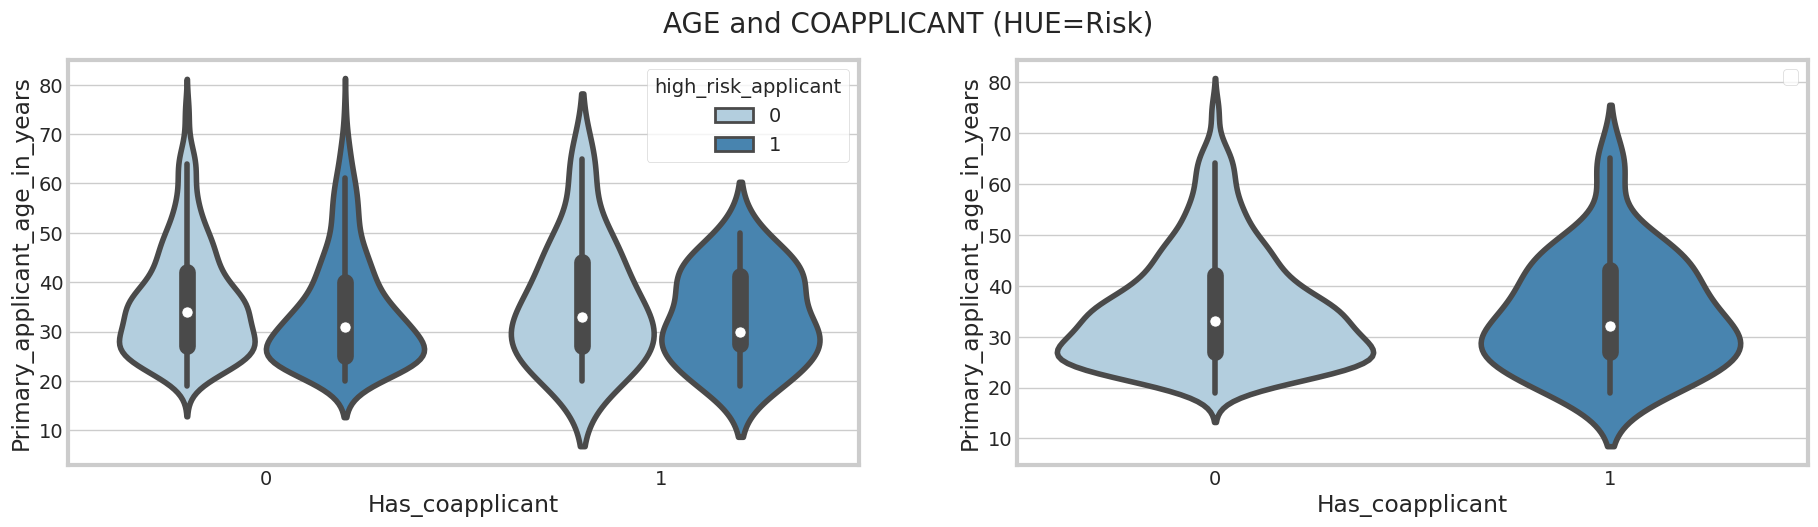

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and COAPPLICANT (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_coapplicant'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_coapplicant'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

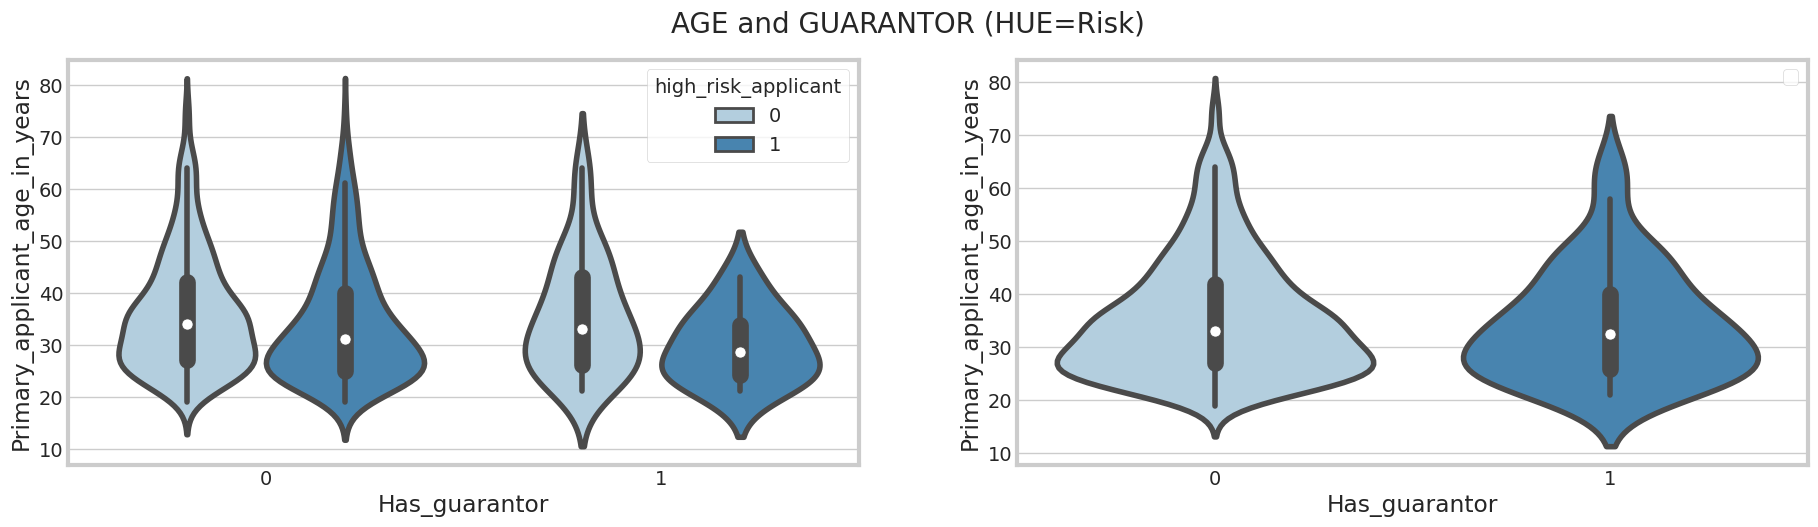

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and GUARANTOR (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_guarantor'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_guarantor'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

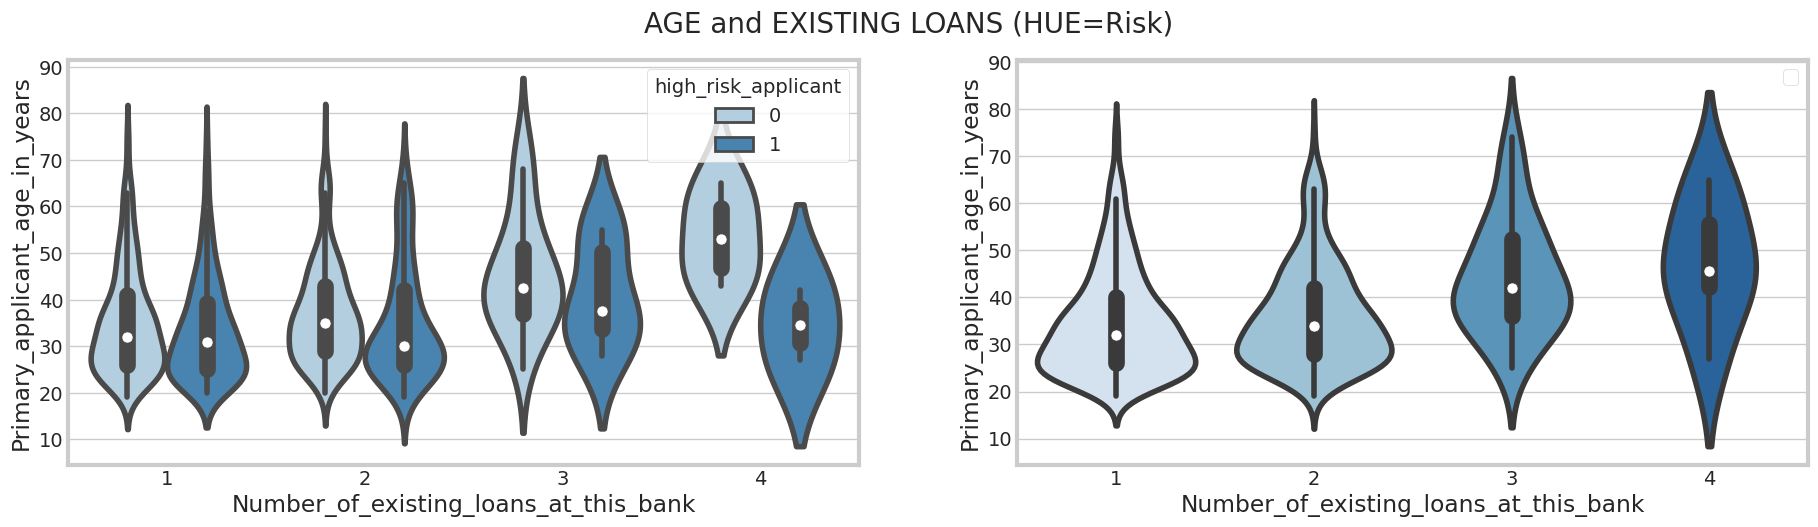

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and EXISTING LOANS (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Number_of_existing_loans_at_this_bank'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Number_of_existing_loans_at_this_bank'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

INFERENCE:
- Males have almost equal probabilities to be low and highly risk resp.But, in case of young female (age between 25-40 years), they are more likely to be highly risky.
- Single and Married fairly less likely to be risky, but divorced and divorced and remarried are more likely to be risky.
- Unskilled residents and unemployed and unskilled non-residents are highly risky, while people in employment and high positions are equally likely to be be both.
- Very high savings balance groups are very less likely to be highly risky, but others are equally likely.
- No loans taken/previous loan paid fully and delayed loans payment very less likely.
- Surprisingly, the ones who appear very risky like the existing loans and loans at this particular bank are equally likely to be highly risky or less risky. However, this also maybe due to lack of more dataset points.
- On the other hand, those who are in critical state, i.e., multiple loans pending are more skewed towards being highly risky.
- The applicant who own their house and free loaders are slightly more likely than renters. However, this also maybe due to lack of more dataset points.
- Education loans are highly risky, meanwhile loans for used vehicle, business, domestic applicances are less risky. For career deveplopment loans have zero risk associated with them. However, this also maybe due to lack of more dataset points. For other categories, they are equally likely.
- People who own Real estate properties and have done Agreements/Savings are slightly risky, but  
- Having no coapplicant is risky. However, coapplicant's presence doesn't gurantee less risk. On the other hand, whether guarantor is present or not, in both cases, there is an associated risk.
- Number of loans at this bank doesn't reveal any feature.

### Principal_loan_amount:

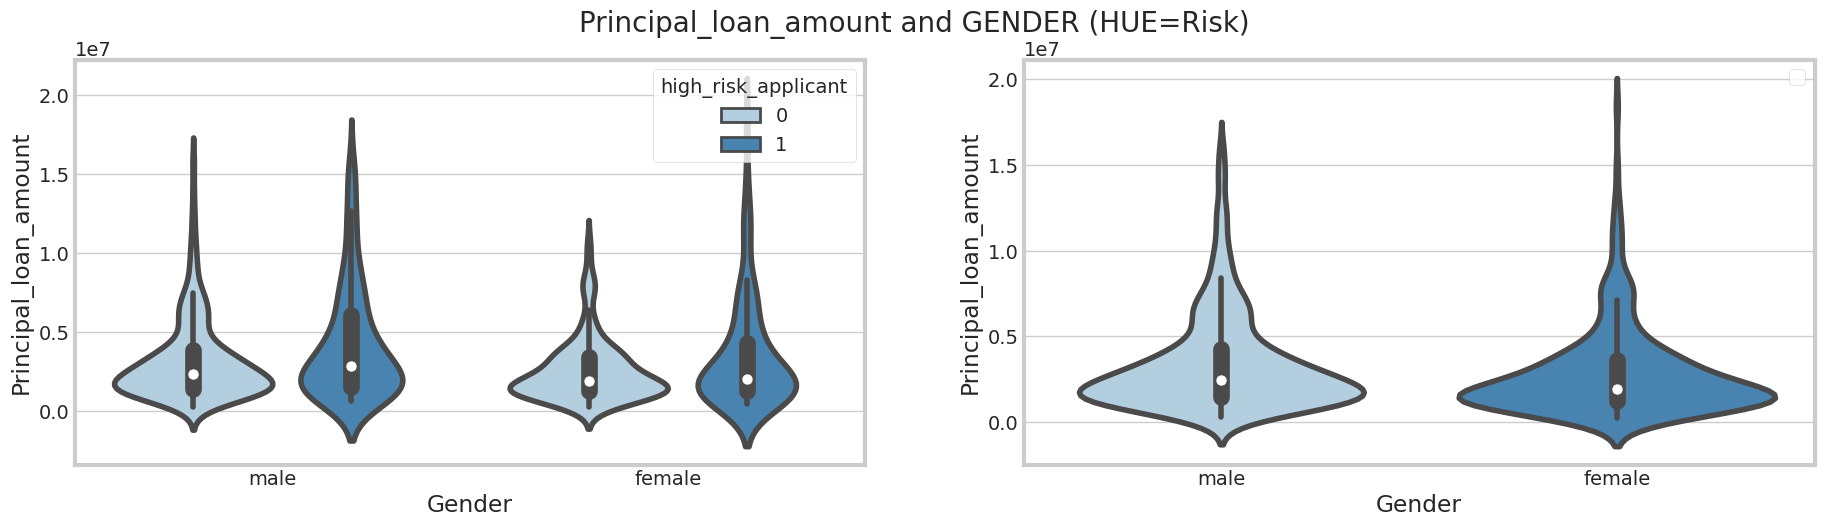

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('Principal_loan_amount and GENDER (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Gender'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Gender'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

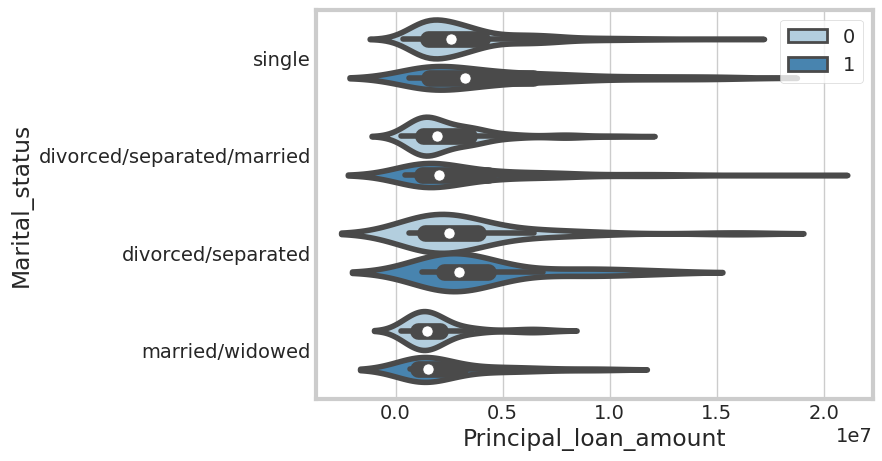

In [46]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Marital_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

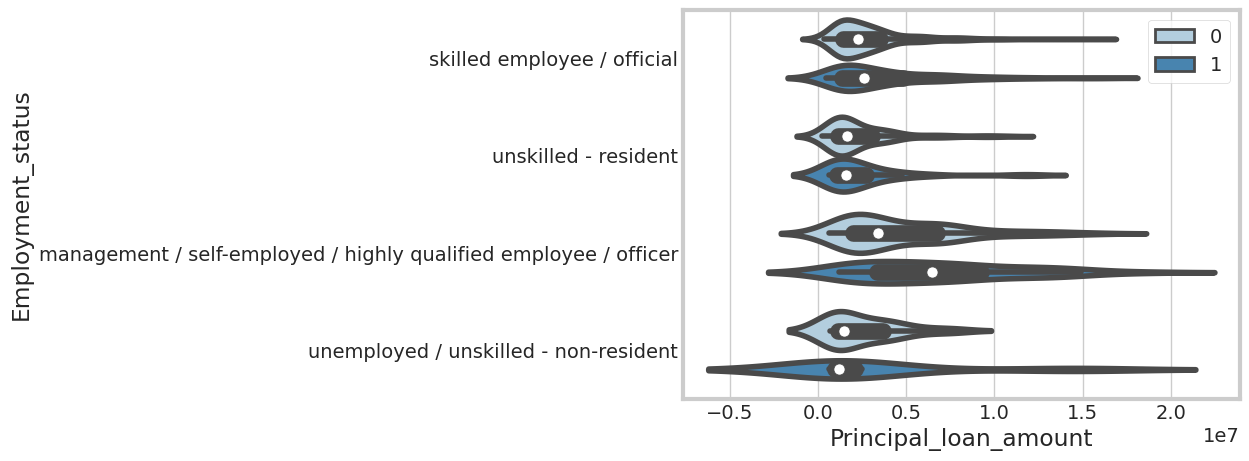

In [47]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Employment_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

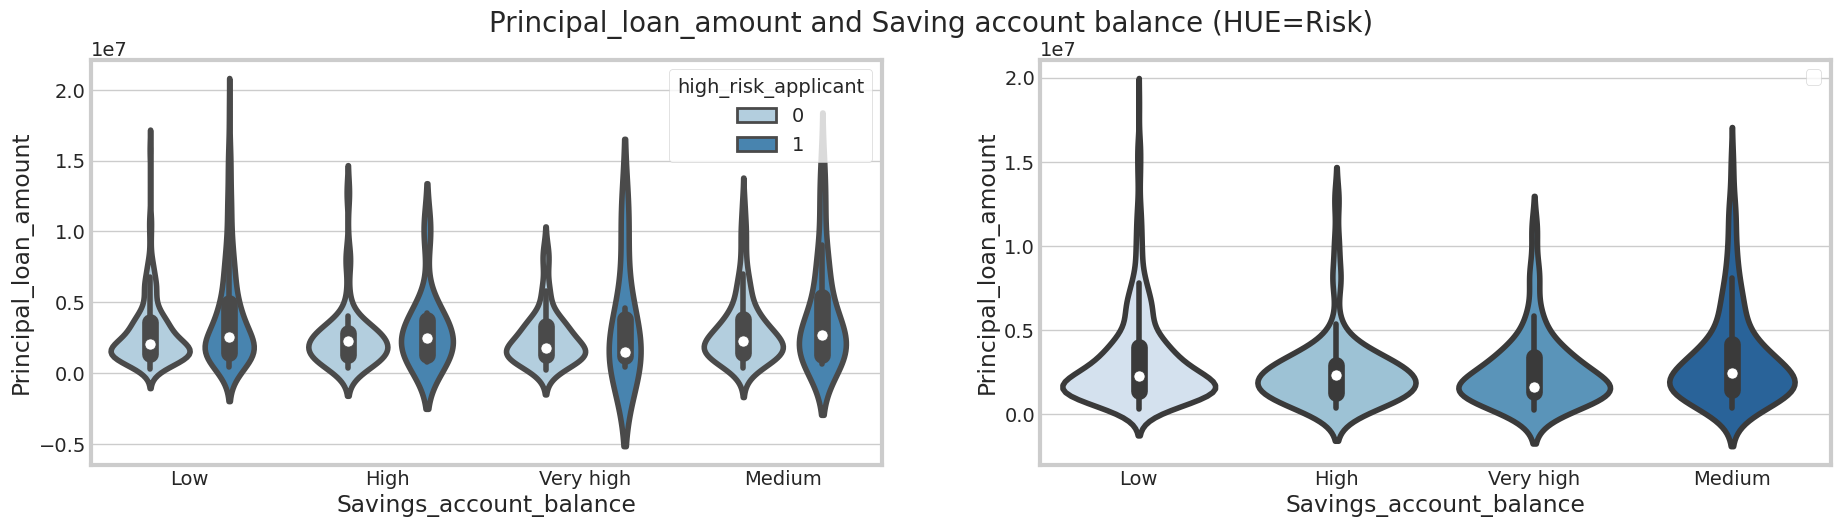

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('Principal_loan_amount and Saving account balance (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Savings_account_balance'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Savings_account_balance'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

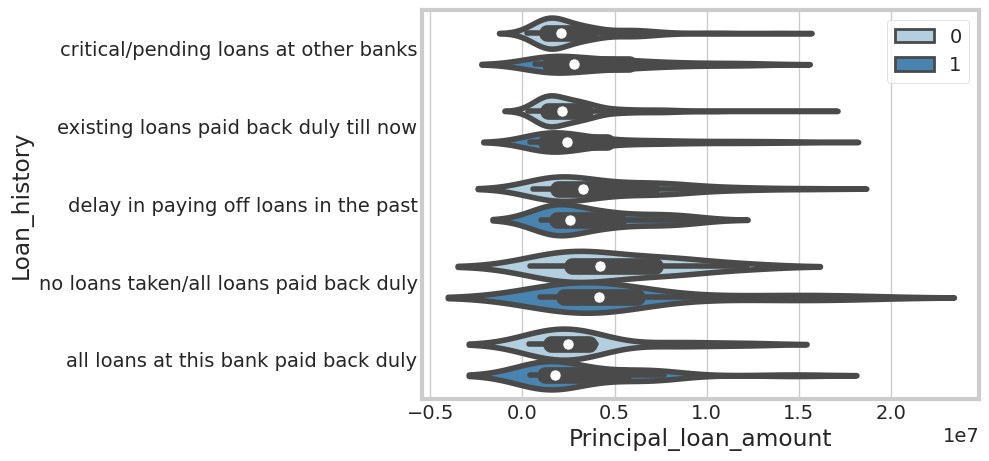

In [49]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Loan_history'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

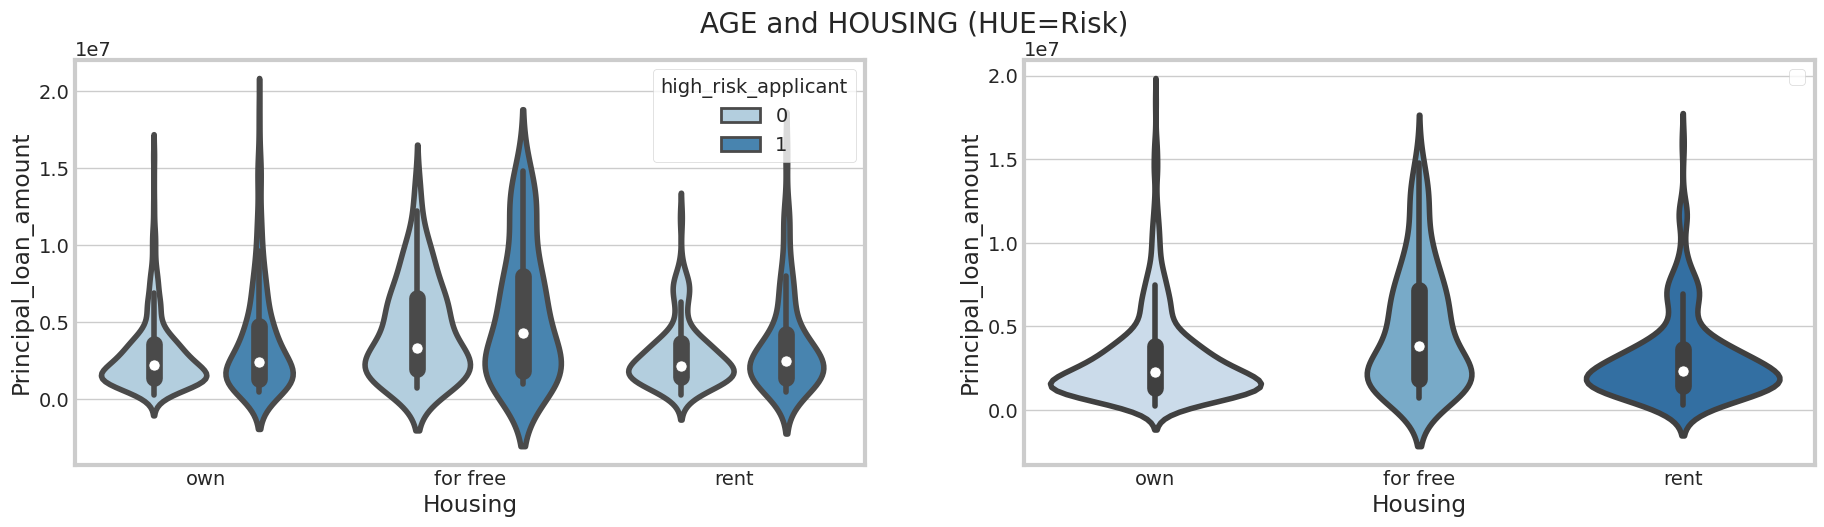

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and HOUSING (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Housing'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Housing'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

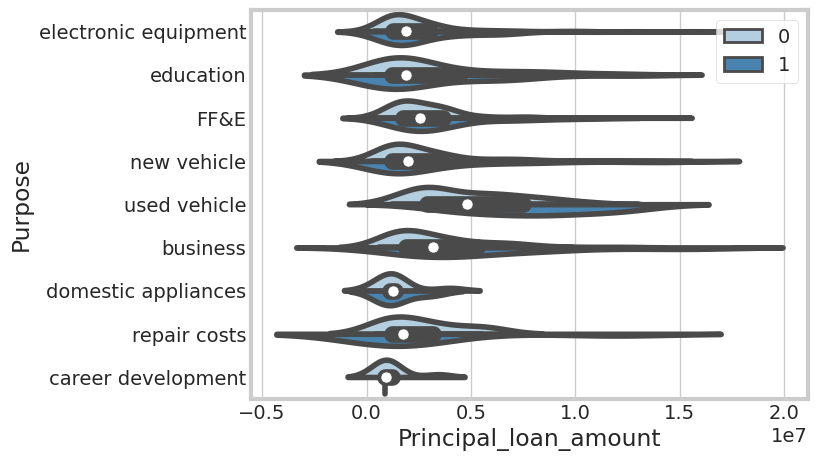

In [51]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Purpose'], hue=df.high_risk_applicant, palette="Blues", split=True)
plt.legend(loc='upper right')
plt.show()

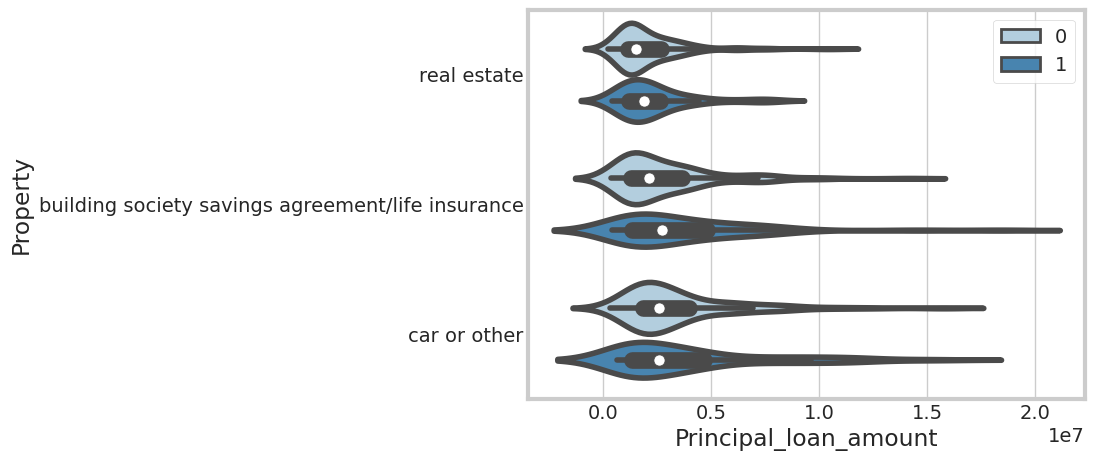

In [52]:

sns.violinplot(x = df['Principal_loan_amount'], y = df['Property'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()


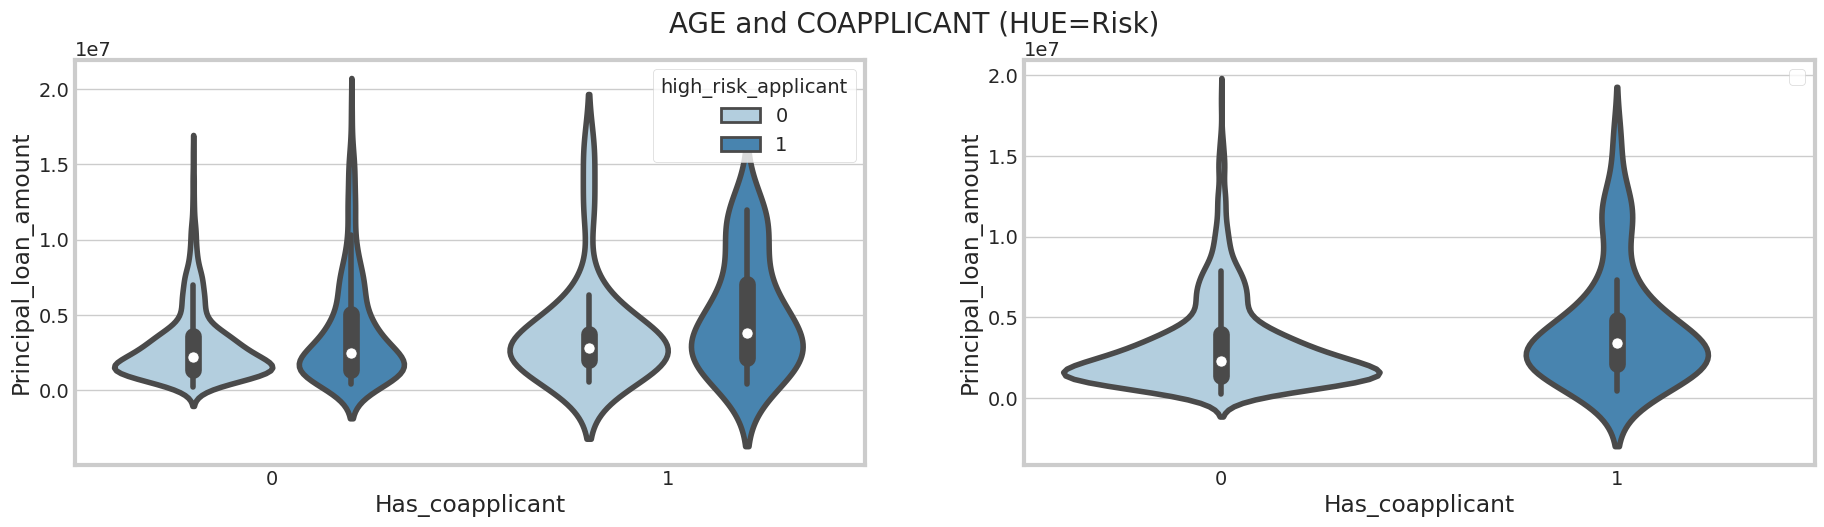

In [53]:

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and COAPPLICANT (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_coapplicant'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_coapplicant'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

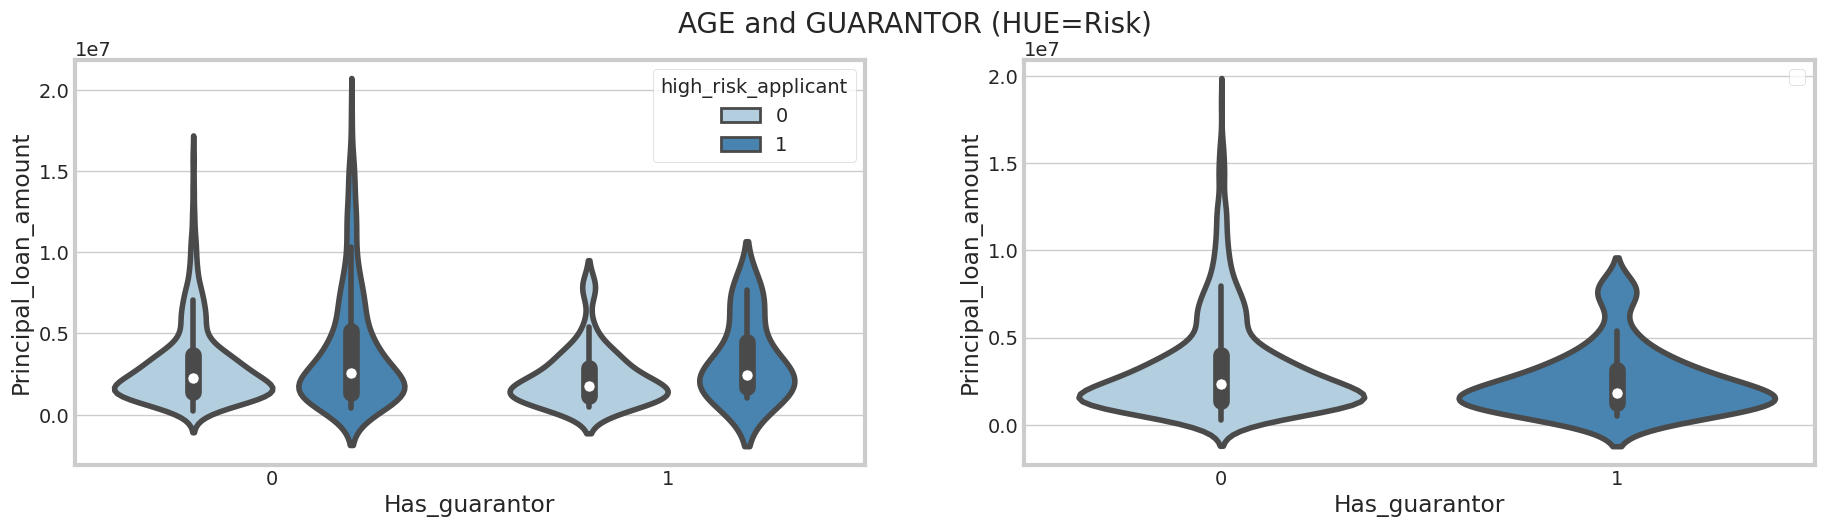

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and GUARANTOR (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_guarantor'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_guarantor'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

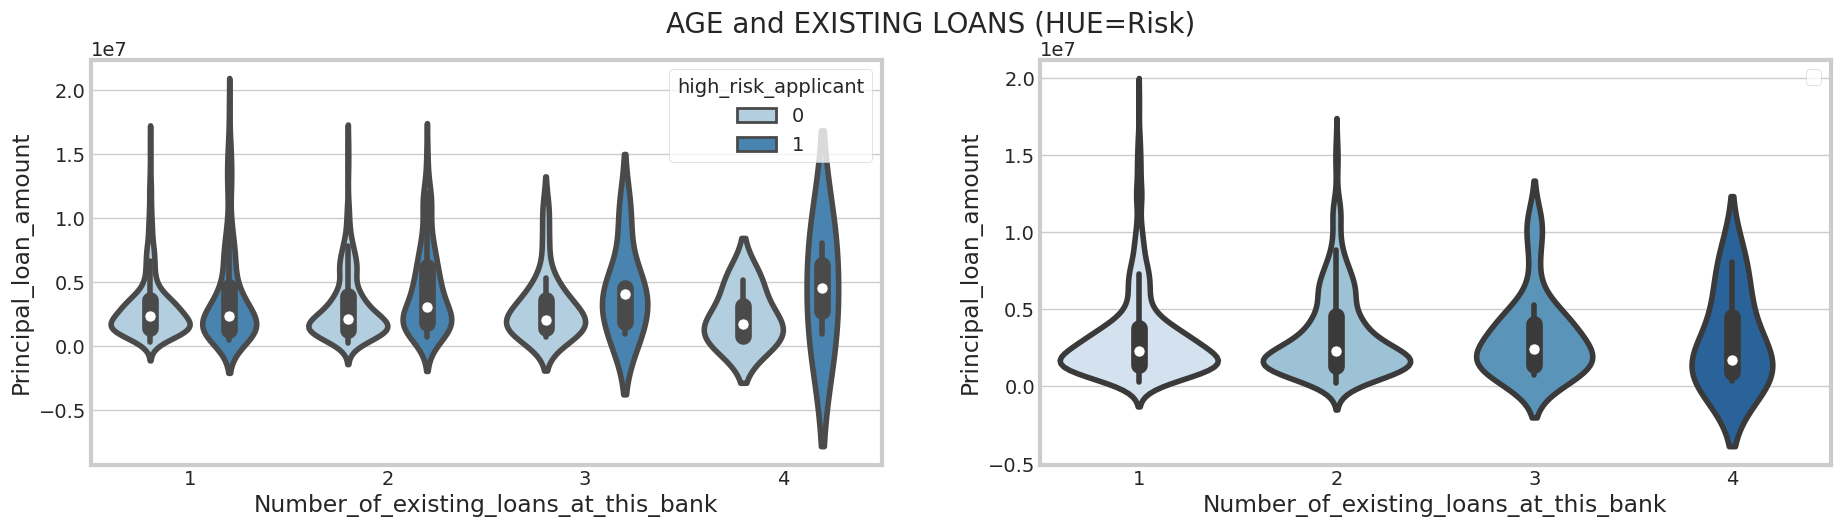

In [55]:

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and EXISTING LOANS (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Number_of_existing_loans_at_this_bank'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Number_of_existing_loans_at_this_bank'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

INFERENCE:
- Both male and females taking loan equivalent to most popular choice are less likely to be highly risky.
- Here divorced/remarried are less likely to pose a risk, but seperated ones still appear to be risky.
- Interestingly, all groups in employment status appear to be less risky, especially unskilled applicants. However, our previous analysis in the age group of 20-45 years proved that they were risky.
- Same contrasting features can be seen in case of loan_history feature
- For purpose feature, apparently higher principal loan for used vehicle is risky as compared to before.
- No new information for Savings_account_balance, Housing, Property, Coapplicant, Guarantor and number of loans features.

## Bivariate for all categorical:

In [56]:
# This is to encode the data into numbers that can be used in our scatterplot
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cat = ['Gender', 'Marital_status', 'Employment_status', 'Savings_account_balance', 'Loan_history',
             'Housing', 'Purpose', 'Property', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']

df_cat = df[cat]
enc_df = pd.DataFrame(ord_enc.fit_transform(df_cat), columns=cat)

# Generate the random noise
xnoise, ynoise = np.random.random(len(df_cat))/3, np.random.random(len(df_cat))/3

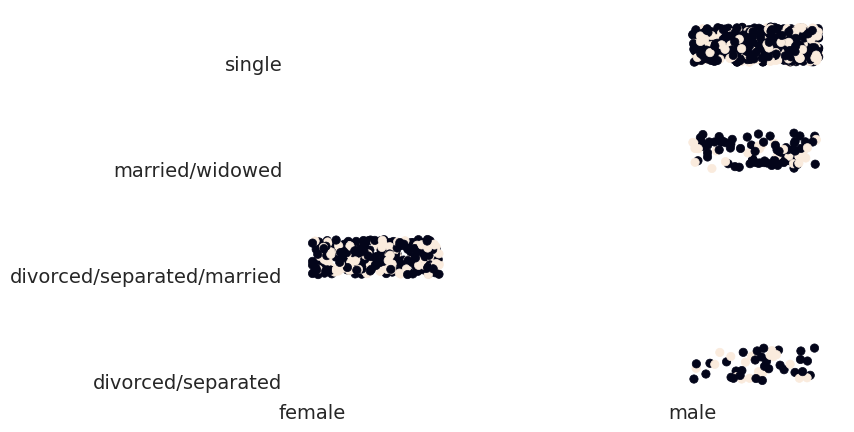

In [57]:
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Marital_status"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3], ord_enc.categories_[1])

plt.grid()
sns.despine(left=True, bottom=True)

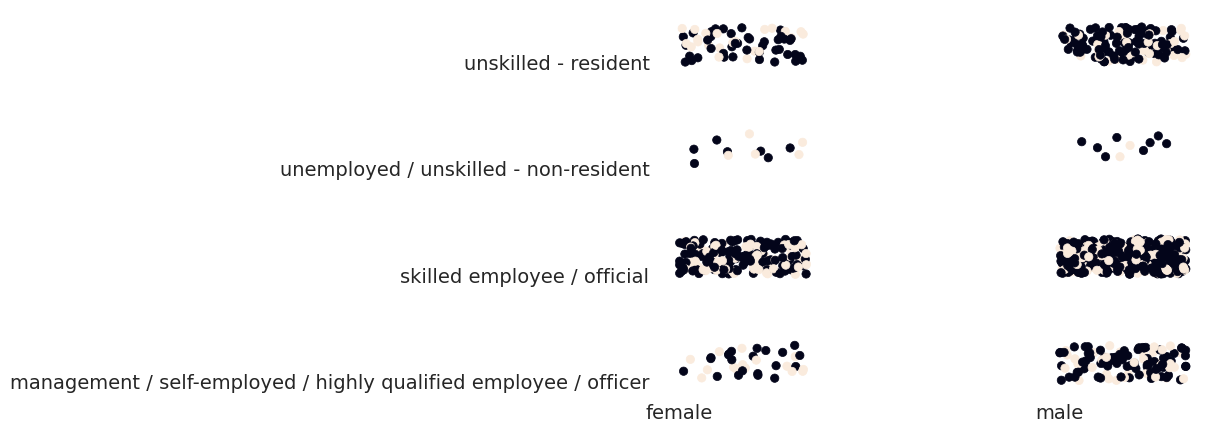

In [58]:
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Employment_status"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3], ord_enc.categories_[2])

plt.grid()
sns.despine(left=True, bottom=True)

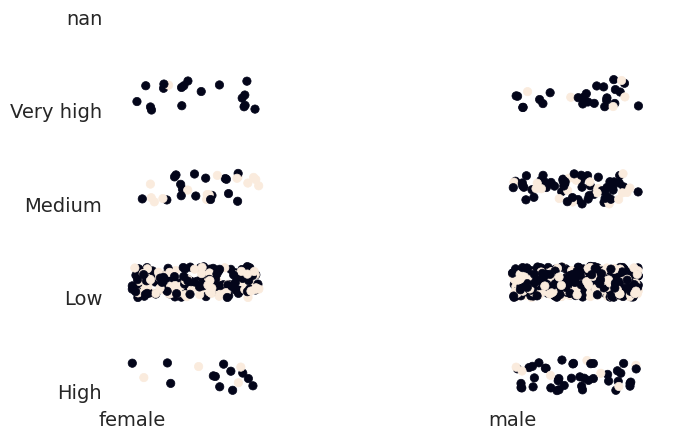

In [59]:
# GENDER AND Savings_account_balance (HUE=RISK)
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Savings_account_balance"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[3])

plt.grid()
sns.despine(left=True, bottom=True)

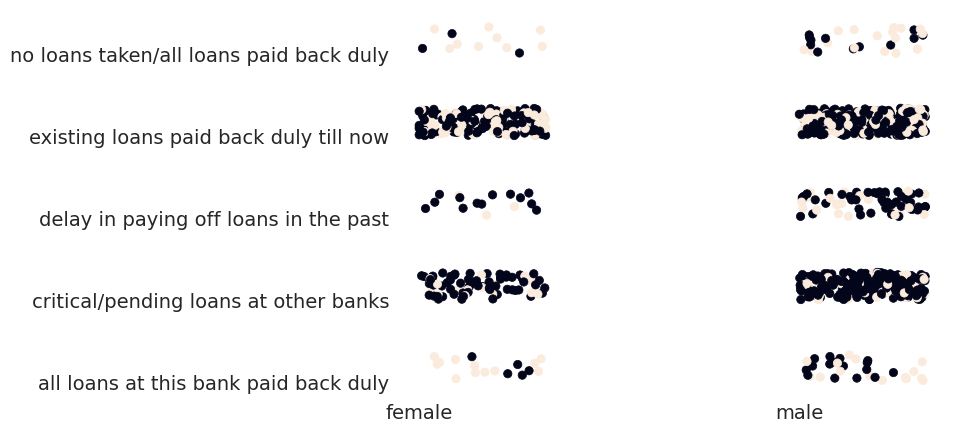

In [60]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4])

plt.grid()
sns.despine(left=True, bottom=True)

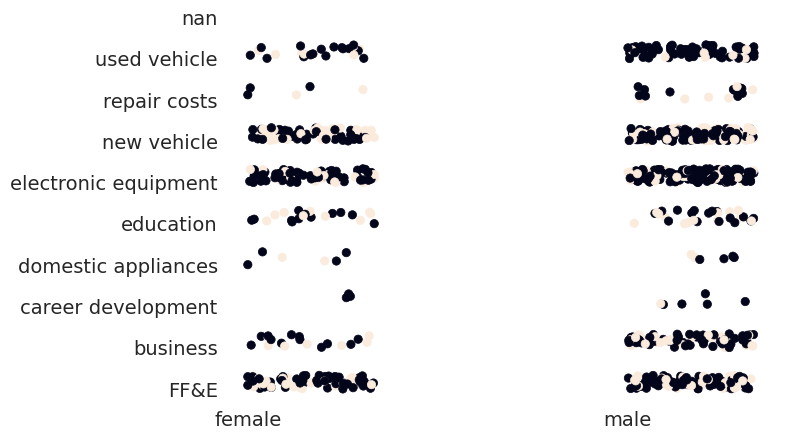

In [61]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6])

plt.grid()
sns.despine(left=True, bottom=True)

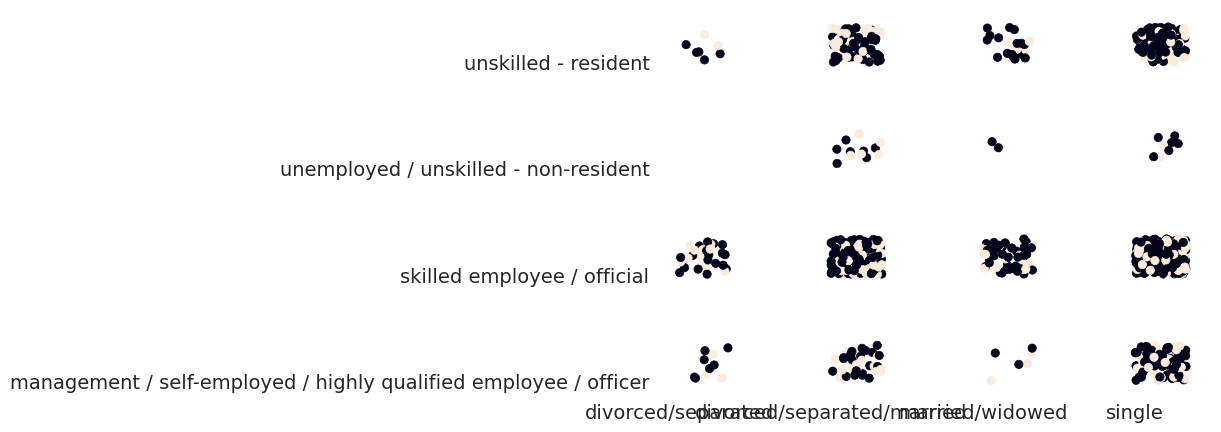

In [62]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Employment_status"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3], ord_enc.categories_[2])

plt.grid()
sns.despine(left=True, bottom=True)

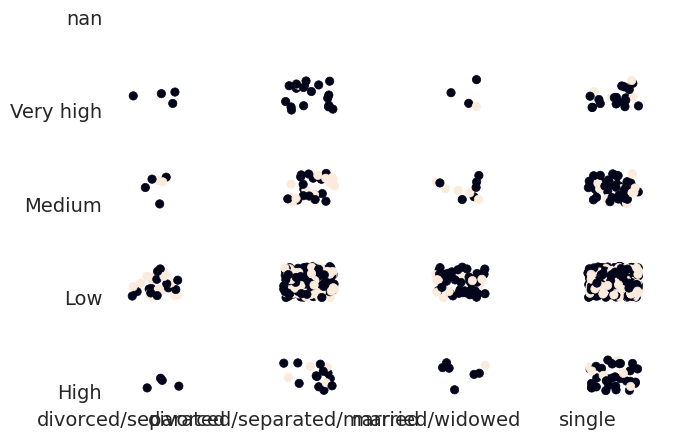

In [63]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Savings_account_balance"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[3])

plt.grid()
sns.despine(left=True, bottom=True)

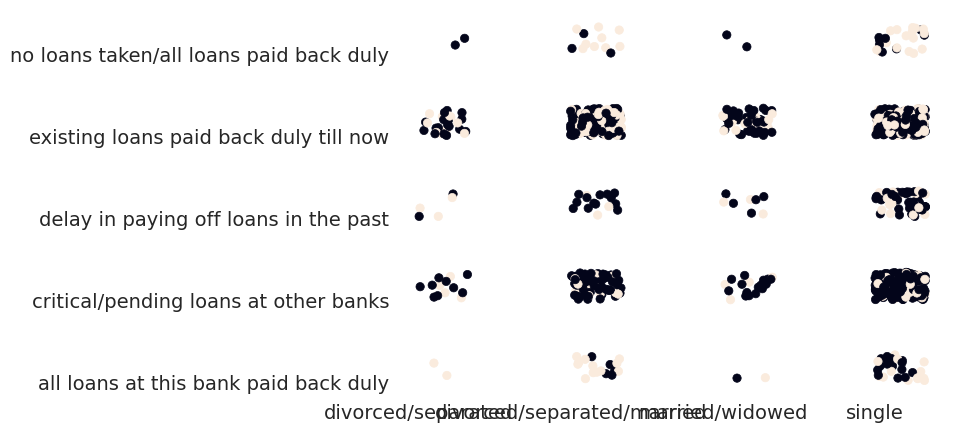

In [64]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4])

plt.grid()
sns.despine(left=True, bottom=True)

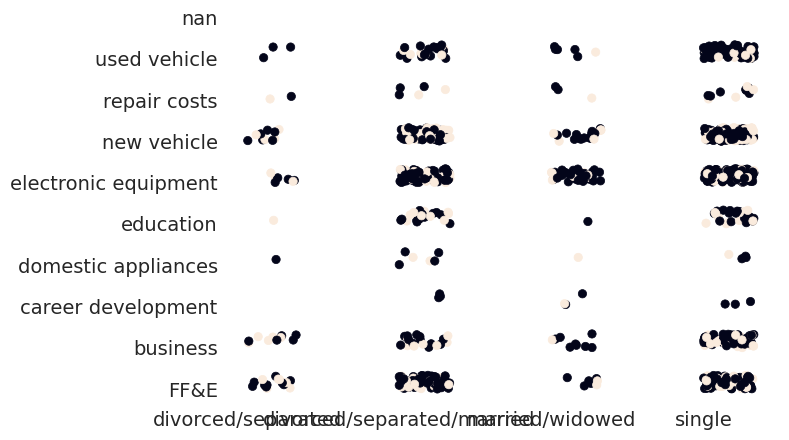

In [65]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6])

plt.grid()
sns.despine(left=True, bottom=True)

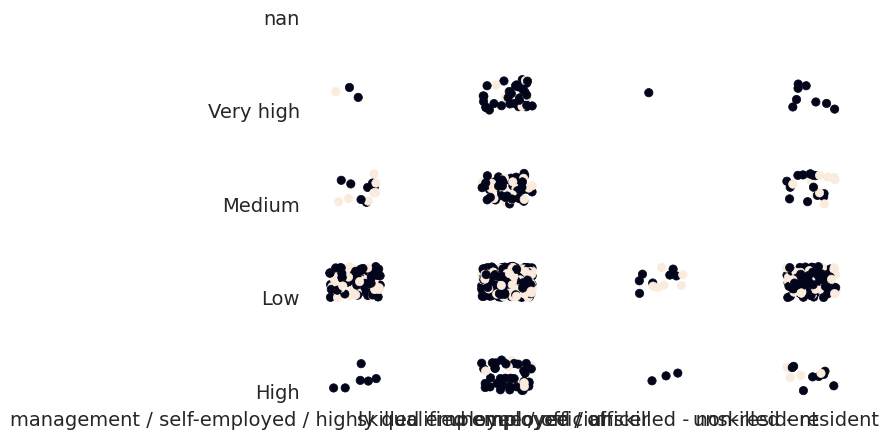

In [66]:
plt.scatter(enc_df["Employment_status"]+xnoise, enc_df["Savings_account_balance"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[2])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[3])

plt.grid()
sns.despine(left=True, bottom=True)

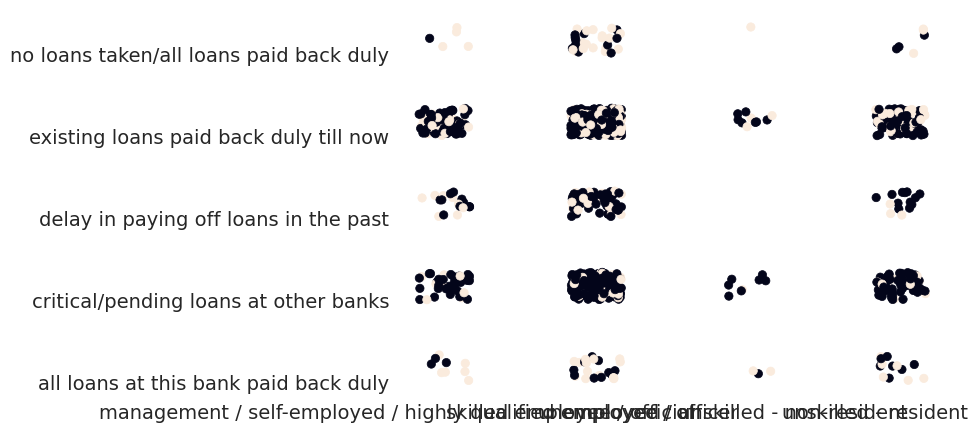

In [67]:
plt.scatter(enc_df["Employment_status"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[2])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4])

plt.grid()
sns.despine(left=True, bottom=True)

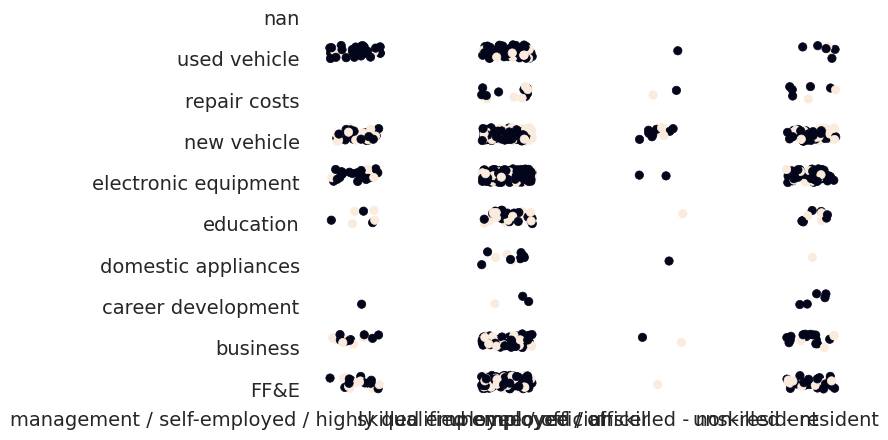

In [68]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Employment_status"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[2])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6])

plt.grid()
sns.despine(left=True, bottom=True)

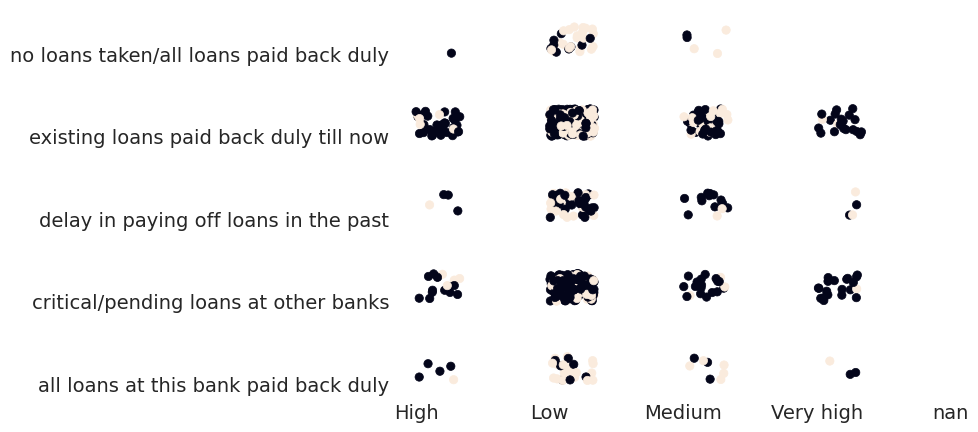

In [69]:
plt.scatter(enc_df["Savings_account_balance"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3, 4], ord_enc.categories_[3])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4])

plt.grid()
sns.despine(left=True, bottom=True)

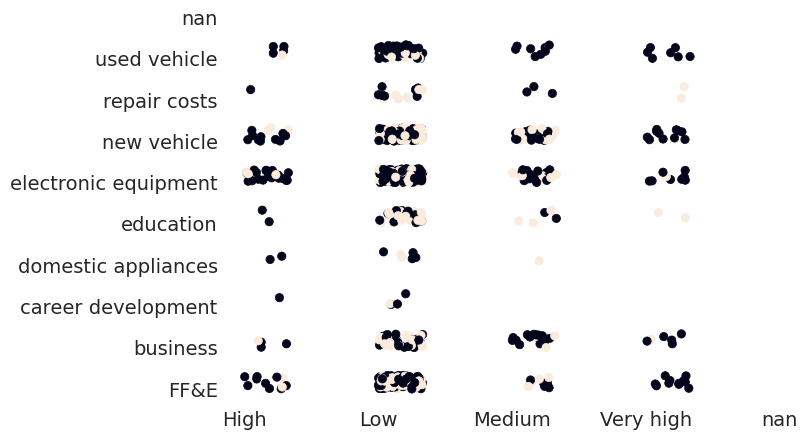

In [70]:
plt.scatter(enc_df["Savings_account_balance"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3, 4], ord_enc.categories_[3])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6])

plt.grid()
sns.despine(left=True, bottom=True)

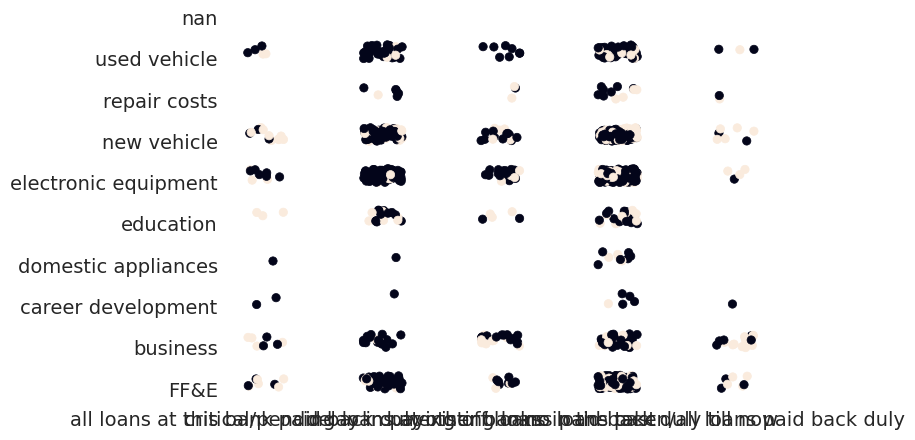

In [71]:
plt.scatter(enc_df["Loan_history"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3, 4], ord_enc.categories_[4])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6])

plt.grid()
sns.despine(left=True, bottom=True)

# Overall summary:

RISKY GROUPS ARE (According to given dataset):
- Females have a higher chance than males.
- Divorced/Remarried females and Divorced males.
- Unskilled residents and non-residents.
- Savings_account_balance doesn't point any specific group, i.e., each group is equally likely.
- Due to lack of datapoints, it appears that each case of loan_history is equally likely, with multiple loan pending group being slightly more riskier than others.
- People living on free basis are slighly more likely.
- Education loans are very risky.
- Applicants owning real estate and in some agreement/savings are slightly risky.
- Having no coapplicant is risky. However, coapplicant's presence doesn't gurantee less risk. On the other hand, whether guarantor is present or not, in both cases, there is an associated risk.


# Dealing with missing values:

## Specific cases:

In [72]:
df1.isna().sum()

Primary_applicant_age_in_years                   0
Gender                                           0
Marital_status                                   0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Employment_status                                0
Has_been_employed_for_at_least                  62
Has_been_employed_for_at_most                  253
Foreign_worker                                   0
Savings_account_balance                        183
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                   

In [73]:
df[df['Has_been_employed_for_at_least'].isna()].head(25)

applicant_id  Primary_applicant_age_in_years  Gender  \
9         1722991                              28    male   
47        1395153                              23  female   
56        1361963                              52    male   
128       1125378                              34    male   
163       1628583                              70    male   
166       1279502                              33  female   
172       1388983                              34  female   
175       1126090                              53  female   
187       1308726                              68    male   
212       1613024                              50    male   
235       1216325                              30    male   
236       1810247                              23    male   
249       1276035                              22  female   
259       1513777                              57  female   
272       1799149                              36    male   
287       1761078                              31    male   
300       1313483                              54  female   
310       1538187                              40    male   
320       1443537                              28    male   
330       1397184                              75    male   
347       1318823                              23  female   
352       1806619                              38    male   
364       1331656                              25    male   
376       1711334                              34    male   
381       1530567                              38  female   

                 Marital_status  Number_of_dependents   Housing  \
9               married/widowed                     1       own   
47   divorced/separated/married                     1      rent   
56                       single                     1       own   
128                      single                     1       own   
163                      single                     1  for free   
166  divorced/separated/married                     1       own   
172  divorced/separated/married                     1       own   
175  divorced/separated/married                     1       own   
187                      single                     1  for free   
212                      single                     1       own   
235                      single                     2       own   
236                      single                     1       own   
249  divorced/separated/married                     1      rent   
259  divorced/separated/married                     1       own   
272                      single                     1  for free   
287                      single                     1  for free   
300  divorced/separated/married                     1       own   
310                      single                     1  for free   
320             married/widowed                     1       own   
330                      single                     1  for free   
347  divorced/separated/married                     1      rent   
352                      single                     1       own   
364                      single                     1       own   
376             married/widowed                     1       own   
381  divorced/separated/married                     1  for free   

     Years_at_current_residence  \
9                             2   
47                            2   
56                            1   
128                           2   
163                           4   
166                           2   
172                           2   
175                           1   
187                           3   
212                           4   
235                           2   
236                           2   
249                           4   
259                           4   
272                           4   
287                           4   
300                           4   
310                           4   
320       

In [74]:
df1[df1['Has_been_employed_for_at_most'].isna()].head(25)

Primary_applicant_age_in_years  Gender              Marital_status  \
0                               67    male                      single   
6                               53    male                      single   
13                              60    male                      single   
16                              53    male                      single   
18                              44  female  divorced/separated/married   
19                              31    male                      single   
26                              39    male             married/widowed   
29                              63    male                      single   
33                              57    male                      single   
40                              30    male                      single   
44                              58  female  divorced/separated/married   
46                              39    male                      single   
51                              30    male                      single   
54                              57    male                      single   
58                              23  female  divorced/separated/married   
61                              50    male                      single   
62                              61    male                      single   
65                              48    male                      single   
71                              46    male                      single   
72                              51    male                      single   
74                              40    male                      single   
75                              66    male                      single   
81                              47    male                      single   
83                              58  female  divorced/separated/married   
84                              52    male                      single   

    Number_of_dependents   Housing  Years_at_current_residence  \
0                      1       own                           4   
6                      1       own                           4   
13                     1       own                           4   
16                     1       own                           4   
18                     1  for free                           2   
19                     2       own                           2   
26                     1       own                           4   
29                     1       own                           4   
33                     1      rent                           4   
40                     1       own                           2   
44                     1  for free                           4   
46                     1       own                           4   
51                     1       own                           2   
54                     1  for free                           4   
58                     1       own                           2   
61                     1       own                           4   
62                     1  for free                           4   
65                     2       own                           4   
71                     1      rent                           2   
72                     2  for free                           4   
74                     1       own                           4   
75                     1  for free                           4   
81                     1       own                           3   
83                     1       own                           4   
84                     1       own                           4   

                                    Employment_status  \
0                         skilled employee / official   
6                         skilled employee / official   
13                               unskilled - resident   
16                        skilled employee / official   
18  management / self-employed / highly qualified ...   
19                  

In [75]:
df[df['Savings_account_balance'].isna()].head(25)

applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
5         1213971                              35    male   
16        1193245                              53    male   
17        1740408                              25    male   
24        1847764                              26    male   
33        1873969                              57    male   
50        1850736                              29    male   
53        1502325                              31    male   
55        1875288                              26    male   
56        1361963                              52    male   
61        1570047                              50    male   
65        1134752                              48    male   
69        1724882                              25  female   
71        1804919                              46    male   
74        1472593                              40    male   
78        1691240                              39    male   
80        1403464                              44  female   
92        1601892                              33  female   
93        1220273                              20    male   
96        1610826                              61  female   
99        1617889                              36    male   
104       1114473                              26    male   
108       1698579                              30  female   
115       1848791                              47    male   
116       1229152                              30  female   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
5                        single                     2  for free   
16                       single                     1       own   
17                       single                     1       own   
24              married/widowed                     1       own   
33                       single                     1      rent   
50                       single                     1       own   
53                       single                     1       own   
55                       single                     2       own   
56                       single                     1       own   
61                       single                     1       own   
65                       single                     2       own   
69   divorced/separated/married                     1       own   
71                       single                     1      rent   
74                       single                     1       own   
78                       single                     2       own   
80   divorced/separated/married                     1       own   
92   divorced/separated/married                     2       own   
93                       single                     1      rent   
96   divorced/separated/married                     1       own   
99                       single                     2      rent   
104             married/widowed                     1      rent   
108  divorced/separated/married                     1       own   
115                      single                     1       own   
116  divorced/separated/married                     1       own   

     Years_at_current_residence  \
0                             4   
5                             4   
16                            4   
17                            3   
24                            1   
33                            4   
50                            2   
53                            1   
55                            2   
56                            1   
61                            4   
65                            4   
69                            4   
71                            2   
74                            4   
78                            2   
80                            1   
92                            3   
93        

In [76]:
df[df['Purpose'].isna()]

applicant_id  Primary_applicant_age_in_years  Gender  \
72        1591747                              51    male   
83        1616296                              58  female   
105       1514853                              39    male   
287       1761078                              31    male   
310       1538187                              40    male   
374       1663400                              60  female   
431       1304185                              29    male   
442       1327436                              29    male   
594       1307369                              40    male   
665       1483329                              27    male   
818       1113817                              43    male   
915       1181133                              32  female   

                 Marital_status  Number_of_dependents   Housing  \
72                       single                     2  for free   
83   divorced/separated/married                     1       own   
105                      single                     2       own   
287                      single                     1  for free   
310                      single                     1  for free   
374  divorced/separated/married                     1  for free   
431                      single                     1       own   
442                      single                     1       own   
594                      single                     1       own   
665                      single                     1       own   
818          divorced/separated                     1       own   
915  divorced/separated/married                     1       own   

     Years_at_current_residence  \
72                            4   
83                            4   
105                           3   
287                           4   
310                           4   
374                           4   
431                           3   
442                           3   
594                           3   
665                           2   
818                           3   
915                           2   

                                     Employment_status  \
72   management / self-employed / highly qualified ...   
83                                unskilled - resident   
105  management / self-employed / highly qualified ...   
287  management / self-employed / highly qualified ...   
310              unemployed / unskilled - non-resident   
374  management / self-employed / highly qualified ...   
431  management / self-employed / highly qualified ...   
442                        skilled employee / official   
594  management / self-employed / highly qualified ...   
665  management / self-employed / highly qualified ...   
818  management / self-employed / highly qualified ...   
915  management / self-employed / highly qualified ...   

    Has_been_employed_for_at_least Has_been_employed_for_at_most  ... Purpose  \
72                         7 years                           NaN  ...     NaN   
83                         7 years                           NaN  ...     NaN   
105                         1 year                       4 years  ...     NaN   
287                            NaN                        0 year  ...     NaN   
310                            NaN                        0 year  ...     NaN   
374                        7 years                           NaN  ...     NaN   
431                         1 year                       4 years  ...     NaN   
442                         1 year                       4 years  ...     NaN   
594                        7 years                           NaN  ...     NaN   
665                            NaN                        0 year  ...     NaN   
818                            NaN                        0 year  ...     NaN   
915                         1 year                       4 years  ...     NaN   

     Principal_loan_amount EMI_rate_in_percentage_of_disposable_income  \


In [77]:
df[df['Property'].isna()].head(30)

applicant_id  Primary_applicant_age_in_years  Gender  \
4         1674436                              53    male   
5         1213971                              35    male   
18        1250076                              44  female   
29        1323870                              63    male   
33        1873969                              57    male   
36        1674114                              31    male   
44        1246402                              58  female   
54        1151072                              57    male   
56        1361963                              52    male   
59        1274604                              23  female   
62        1825757                              61    male   
68        1388519                              37    male   
72        1591747                              51    male   
74        1472593                              40    male   
75        1641977                              66    male   
87        1586725                              47    male   
93        1220273                              20    male   
95        1416025                              58    male   
106       1645589                              39    male   
123       1852036                              63    male   
133       1834069                              47    male   
141       1432828                              30  female   
146       1387053                              39  female   
150       1403203                              42    male   
153       1115975                              29  female   
163       1628583                              70    male   
186       1645519                              74  female   
191       1493175                              34    male   
198       1855241                              36    male   
199       1709944                              40    male   

                 Marital_status  Number_of_dependents   Housing  \
4                        single                     2  for free   
5                        single                     2  for free   
18   divorced/separated/married                     1  for free   
29                       single                     1       own   
33                       single                     1      rent   
36                       single                     1  for free   
44   divorced/separated/married                     1  for free   
54                       single                     1  for free   
56                       single                     1       own   
59   divorced/separated/married                     1      rent   
62                       single                     1  for free   
68                       single                     1  for free   
72                       single                     2  for free   
74                       single                     1       own   
75                       single                     1  for free   
87                       single                     2  for free   
93                       single                     1      rent   
95                       single                     1      rent   
106                      single                     2       own   
123                      single                     1  for free   
133                      single                     1  for free   
141  divorced/separated/married                     1       own   
146  divorced/separated/married                     1       own   
150                      single                     2  for free   
153  divorced/separated/married                     1      rent   
163                      single                     1  for free   
186  divorced/separated/married                     2  for free   
191                      single                     2  for free   
198                      single                     1  for free   
199          divorced/separated                     1       own   

     Years_at_current_residence  \


## Fixing:

In [78]:
df1['Has_been_employed_for_at_least'] = df1['Has_been_employed_for_at_least'].fillna('0 year')

In [79]:
# least_working_age = 23
# max_employ = {'Has_been_employed_for_at_most':[]}

# for idx, row in df.iterrows():

#   if type(row['Has_been_employed_for_at_most'])=='str':
#      max_employ['Has_been_employed_for_at_most'].append(row['Has_been_employed_for_at_most'])

#   else:
#     max_employ['Has_been_employed_for_at_most'].append(row['Primary_applicant_age_in_years'] - least_working_age)

# df1['Has_been_employed_for_at_most'] = max_employ

In [80]:
df2 = df1.drop('Has_been_employed_for_at_most', axis = 'columns')

In [81]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df3 = pd.DataFrame(imp.fit_transform(df2), columns=df2.columns, index=df2.index)

In [82]:
df3.isna().sum()

Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Foreign_worker                                 0
Savings_account_balance                        0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
dtype: int64

# Feature Engineering:

In [83]:
df3['Age_Group'] = ' '

df4 = df3.copy()
lst = [df4]

for col in lst:
    col.loc[(col['Primary_applicant_age_in_years'] > 18) & (col['Primary_applicant_age_in_years'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Primary_applicant_age_in_years'] > 29) & (col['Primary_applicant_age_in_years'] <= 40), 'Age_Group'] = 'Seniors professionals'
    col.loc[(col['Primary_applicant_age_in_years'] > 40) & (col['Primary_applicant_age_in_years'] <= 55), 'Age_Group'] = 'Old professionals'
    col.loc[col['Primary_applicant_age_in_years'] > 55, 'Age_Group'] = 'Elder citizens'

In [84]:
df3 = df3.drop('Age_Group', axis = 'columns')
df4

Primary_applicant_age_in_years  Gender              Marital_status  \
0                               67    male                      single   
1                               22  female  divorced/separated/married   
2                               49    male                      single   
3                               45    male                      single   
4                               53    male                      single   
..                             ...     ...                         ...   
995                             31  female  divorced/separated/married   
996                             40    male          divorced/separated   
997                             38    male                      single   
998                             23    male                      single   
999                             27    male                      single   

    Number_of_dependents   Housing Years_at_current_residence  \
0                      1       own                          4   
1                      1       own                          2   
2                      2       own                          3   
3                      2  for free                          4   
4                      2  for free                          4   
..                   ...       ...                        ...   
995                    1       own                          4   
996                    1       own                          4   
997                    1       own                          4   
998                    1  for free                          4   
999                    1       own                          4   

                                     Employment_status  \
0                          skilled employee / official   
1                          skilled employee / official   
2                                 unskilled - resident   
3                          skilled employee / official   
4                          skilled employee / official   
..                                                 ...   
995                               unskilled - resident   
996  management / self-employed / highly qualified ...   
997                        skilled employee / official   
998                        skilled employee / official   
999                        skilled employee / official   

    Has_been_employed_for_at_least Foreign_worker Savings_account_balance  \
0                          7 years              1                     Low   
1                           1 year              1                     Low   
2                          4 years              1                     Low   
3                          4 years              1                     Low   
4                           1 year              1                     Low   
..                             ...            ...                     ...   
995                        4 years              1                     Low   
996                         1 year              1                     Low   
997                        7 years              1                     Low   
998                         1 year              1                     Low   
999                         0 year              1                  Medium   

     ...               Purpose Principal_loan_amount  \
0    ...  electronic equipment               1169000   
1    ...  electronic equipment               5951000   
2    ...             education               2096000   
3    ...                  FF&E               7882000   
4    ...           new vehicle               4870000   
..   ...                   ...                   ...   
995  ...                  FF&E               1736000   
996  ...          used vehicle               3857000   
997  ...  electronic equipment                804000   
998  ...  electronic equipment               1845000   
999  ...          used vehicle               4576000   

    EMI_rate_in_percentage_of_disposabl

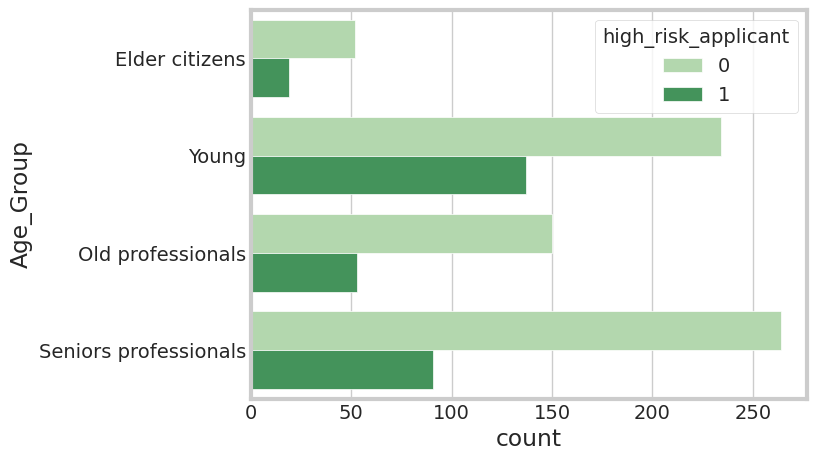

In [85]:
sns.countplot(y = df4['Age_Group'], hue=df4.high_risk_applicant, palette='Greens')
plt.show()

In [91]:
df4['monthly_payment'] = df4["Principal_loan_amount"]/df4["Months_loan_taken_for"]

In [153]:
df5 = df4.drop(["Primary_applicant_age_in_years", "Principal_loan_amount", "Months_loan_taken_for"], axis=1)
df5['Has_been_employed_for_at_least'] = df5['Has_been_employed_for_at_least'].apply(lambda x: x.strip()[0])
# df5['Has_been_employed_for_at_least']

In [154]:
feats = ['Number_of_dependents', 'Years_at_current_residence', 'Has_been_employed_for_at_least',
         'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
         'EMI_rate_in_percentage_of_disposable_income', 'monthly_payment']

numerical_features = ['Has_been_employed_for_at_least', 'EMI_rate_in_percentage_of_disposable_income', 'monthly_payment']

categorical_features = ['Gender', 'Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance',
                        'Property', 'Purpose', 'Loan_history', 'Age_Group']

In [155]:
df6 = df5.copy()
for feat in feats:
  df6[feat] = df6[feat].astype(float)

In [178]:
X = df6
X = X.drop(["high_risk_applicant"], axis = 1)
y = df6["high_risk_applicant"].astype(float).values

# Preprocessing:

## Train-test split:

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 420)

## One-hot encoding and scaling:

In [180]:
numerical_pipeline = Pipeline(
                steps = [
                    ("standard_scaler", StandardScaler(with_mean = True))
                ]
            )

categorical_pipeline = Pipeline(
                steps = [
                    ("one_hot_encoder", OneHotEncoder(sparse_output=False)) # Bcoz for each category, very few categories exist
                ]
            )

preprocessor = ColumnTransformer(
                [("numerical_pipeline", numerical_pipeline, numerical_features),
                 ("categorical_pipeline", categorical_pipeline, categorical_features)
                ]
            )

In [181]:
X_train_transformed = preprocessor.fit_transform(X)
X_test_transformed = preprocessor.transform(X_test)

# Training:

In [186]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    # 'CatBoost': CatBoostClassifier()
}

# Define hyperparameters to tune for each model
param_grid = {
    'Logistic Regression': {'C': [0.05, 0.1, 1, 10], 'class_weight': [None, 'balanced']},
    'Support Vector Machine': {'C': [0.05, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto']},
    'GaussianNB': {},
    'Decision Tree': {'max_depth': [None, 2, 5, 8], 'class_weight': [None, 'balanced'],
                      'min_samples_leaf': [3, 5, 10], 'criterion': ["gini", "entropy"],
                      'min_samples_split':[2, 8, 15]
                      },
    'Random Forest': {'bootstrap': [True, False], 'max_depth': [None, 2, 10, 20],
                      'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],
                      'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 150, 200],
                      'class_weight': [None, 'balanced']},
    # 'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': {'gamma': [0, 0.1, 0.5, 1],
              'min_child_weight': [1, 3, 5],
              'max_depth': [None, 2, 5, 8],
              'n_estimators': [50, 100, 150, 200],
              'subsample':[0.5, 1],
              'colsample_bytree':[0.5, 1],
              'reg_alpha': [0, 0.1, 0.5, 10],
              'reg_lambda': [0, 0.1, 1, 10]}
    # 'CatBoost': CatBoostClassifier()
}

In [187]:
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=3)
    grid_search.fit(X_train_transformed, y)

    # Print best hyperparameters and corresponding score
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

    # Evaluate the model on the test set
    test_score = grid_search.score(X_test_transformed, y_test)
    print(f"Test score for {model_name}: {test_score}\n")

Training and tuning Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 1, 'class_weight': None}
Best score for Logistic Regression: 0.7300024575473678
Test score for Logistic Regression: 0.765

Training and tuning Support Vector Machine...
Best hyperparameters for Support Vector Machine: {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for Support Vector Machine: 0.7309974645303986
Test score for Support Vector Machine: 0.77

Training and tuning GaussianNB...
Best hyperparameters for GaussianNB: {}
Best score for GaussianNB: 0.5811889734045422
Test score for GaussianNB: 0.695

Training and tuning Decision Tree...
Best hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score for Decision Tree: 0.703002403601206
Test score for Decision Tree: 0.7

Training and tuning Random Forest...
Best hyperparameters for Random Forest: {'bootstrap': True, 

In [210]:
best_model_rf = RandomForestClassifier(bootstrap = True, class_weight = None, max_depth = 10, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 10, n_estimators =  50)
best_model_rf.fit(X_train_transformed, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [211]:
y_pred_rf = best_model_rf.predict(X_test_transformed)

In [201]:
best_model_xgb = XGBClassifier(colsample_bytree = 0.5, gamma = 0.5, max_depth = 5, min_child_weight = 1, n_estimators = 50, reg_alpha = 0.5, reg_lambda = 10, subsample = 1)
best_model_xgb.fit(X_train_transformed, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [203]:
y_pred_xgb = best_model_xgb.predict(X_test_transformed)

# Metrics:

## Confusion matrix:

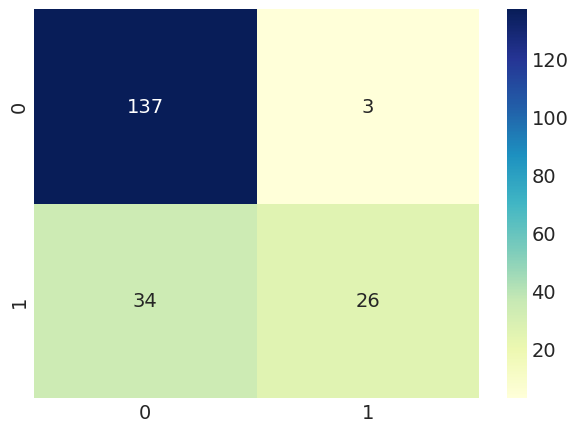

In [212]:
conf = confusion_matrix(y_test, y_pred_rf)

cm = pd.DataFrame(
    conf, index = [i for i in [0, 1]],
    columns = [i for i in [0, 1]]
)

# plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.show()

## Classification report:

In [213]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88       140
         1.0       0.90      0.43      0.58        60

    accuracy                           0.81       200
   macro avg       0.85      0.71      0.73       200
weighted avg       0.83      0.81      0.79       200

